# Housing Prices

The dataset variables are described as follows:

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

The goal is to predict the sales price of the house

## 1- Import Libraries

We first import a list of libraries we will be using

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import Directory
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import model_arena as ma

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We would like to ignore the warnings from some packages

In [2]:
# Ignore warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Global Variables

In [3]:
trainLocation = os.path.join(Directory.dataPath,'train.csv')
testLocation = os.path.join(Directory.dataPath,'test.csv')

## 2- Load the Data

We load the house price data from csv files.

In [4]:
housePriceTrain = pd.read_csv(trainLocation)
housePriceTest = pd.read_csv(testLocation)

# Make a copy of the training data for EDA purposes
housePriceEDA = housePriceTrain.copy()

## 3- EDA

Check to see what the dataset looks like

In [5]:
display(housePriceEDA.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### MSSubClass

Definition: The building class

Insights from below:
- Data is highly left skewed
- There may be some relationship between MSSubClass as Price. Specifically, the greater the MSSubClass the lower the price.
- Applying the function groupMSSubClass may enable a better representation by grouping observation into buckets so that each bucket has enough observations

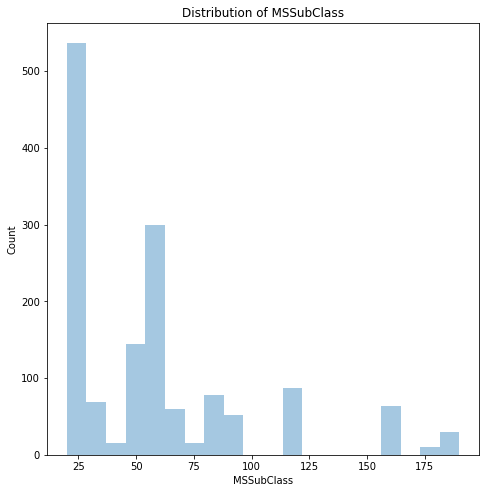

In [6]:
# Create the figure
fig = plt.figure(figsize=(6,6))

# Get the axes
axes = fig.add_axes([0.1,0.1,1,1])

# Plot
sns.distplot(a = housePriceEDA.MSSubClass, kde=False, ax=axes)

# Set the labels and title
axes.set_ylabel('Count')
axes.set_title('Distribution of MSSubClass')

plt.show()

Checking MSSubClass we see that smaller MSSubClasses have slightly higher mean house prices.

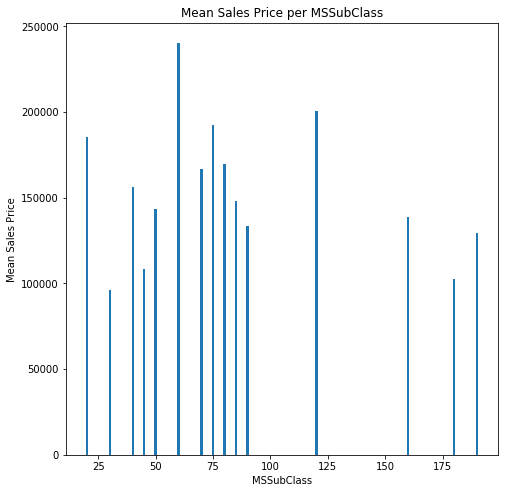

In [7]:
# Get the mean Sales Price per MSSubClass
meanHousePricePerMSSubClass = housePriceEDA[['SalePrice','MSSubClass']].groupby('MSSubClass').mean().reset_index()

# Create the figure object
fig = plt.figure(figsize=(6,6))

# Get the axes
axes = fig.add_axes([0.1,0.1,1,1])

# Set the labels and title
axes.set_xlabel('MSSubClass')
axes.set_ylabel('Mean Sales Price')
axes.set_title('Mean Sales Price per MSSubClass')

# Plot
axes.bar(x = meanHousePricePerMSSubClass.MSSubClass,height=meanHousePricePerMSSubClass.SalePrice,width=1)
plt.show()

Let's group the MSSubClasses in order to even up the distribution

In [8]:
def groupMSSubClass(x):
    if x < 50:
        return 'Class1'
    elif x < 100:
        return 'Class2'
    else:
        return 'Class3'

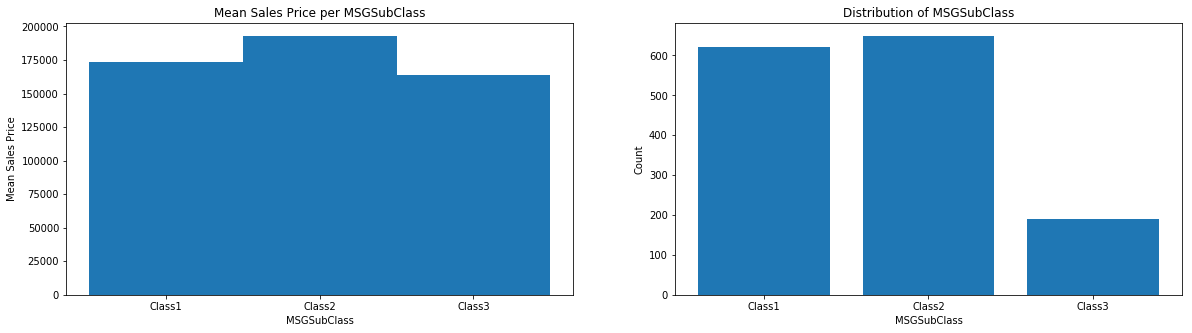

In [9]:
housePriceEDA['MSGSubClass'] = housePriceEDA['MSSubClass'].apply(groupMSSubClass)

# Get the mean Sales Price per MSClass
meanHousePricePerMSGClass = housePriceEDA[['SalePrice','MSGSubClass']].groupby('MSGSubClass').mean().reset_index()

# Create the figure object and get the axes
fig,axes = plt.subplots(ncols=2,)

fig.set_size_inches(20,5)

# Set the labels and title
axes[0].set_xlabel('MSGSubClass')
axes[0].set_ylabel('Mean Sales Price')
axes[0].set_title('Mean Sales Price per MSGSubClass')

axes[1].set_xlabel('MSGSubClass')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of MSGSubClass')

# Plot
axes[0].bar(x = meanHousePricePerMSGClass.MSGSubClass,height=meanHousePricePerMSGClass.SalePrice,width=1)
axes[1].bar(x = housePriceEDA['MSGSubClass'].value_counts().sort_index().reset_index().iloc[:,0],\
           height = housePriceEDA['MSGSubClass'].value_counts().sort_index().reset_index().iloc[:,1])
plt.show()


In [10]:
housePriceEDA.iloc[:,40:].head()

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSGSubClass
0,Ex,Y,SBrkr,856,854,0,1710,1,0,2,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Class2
1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Class1
2,Ex,Y,SBrkr,920,866,0,1786,1,0,2,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Class2
3,Gd,Y,SBrkr,961,756,0,1717,1,0,1,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Class2
4,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Class2


In [11]:
housePriceEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

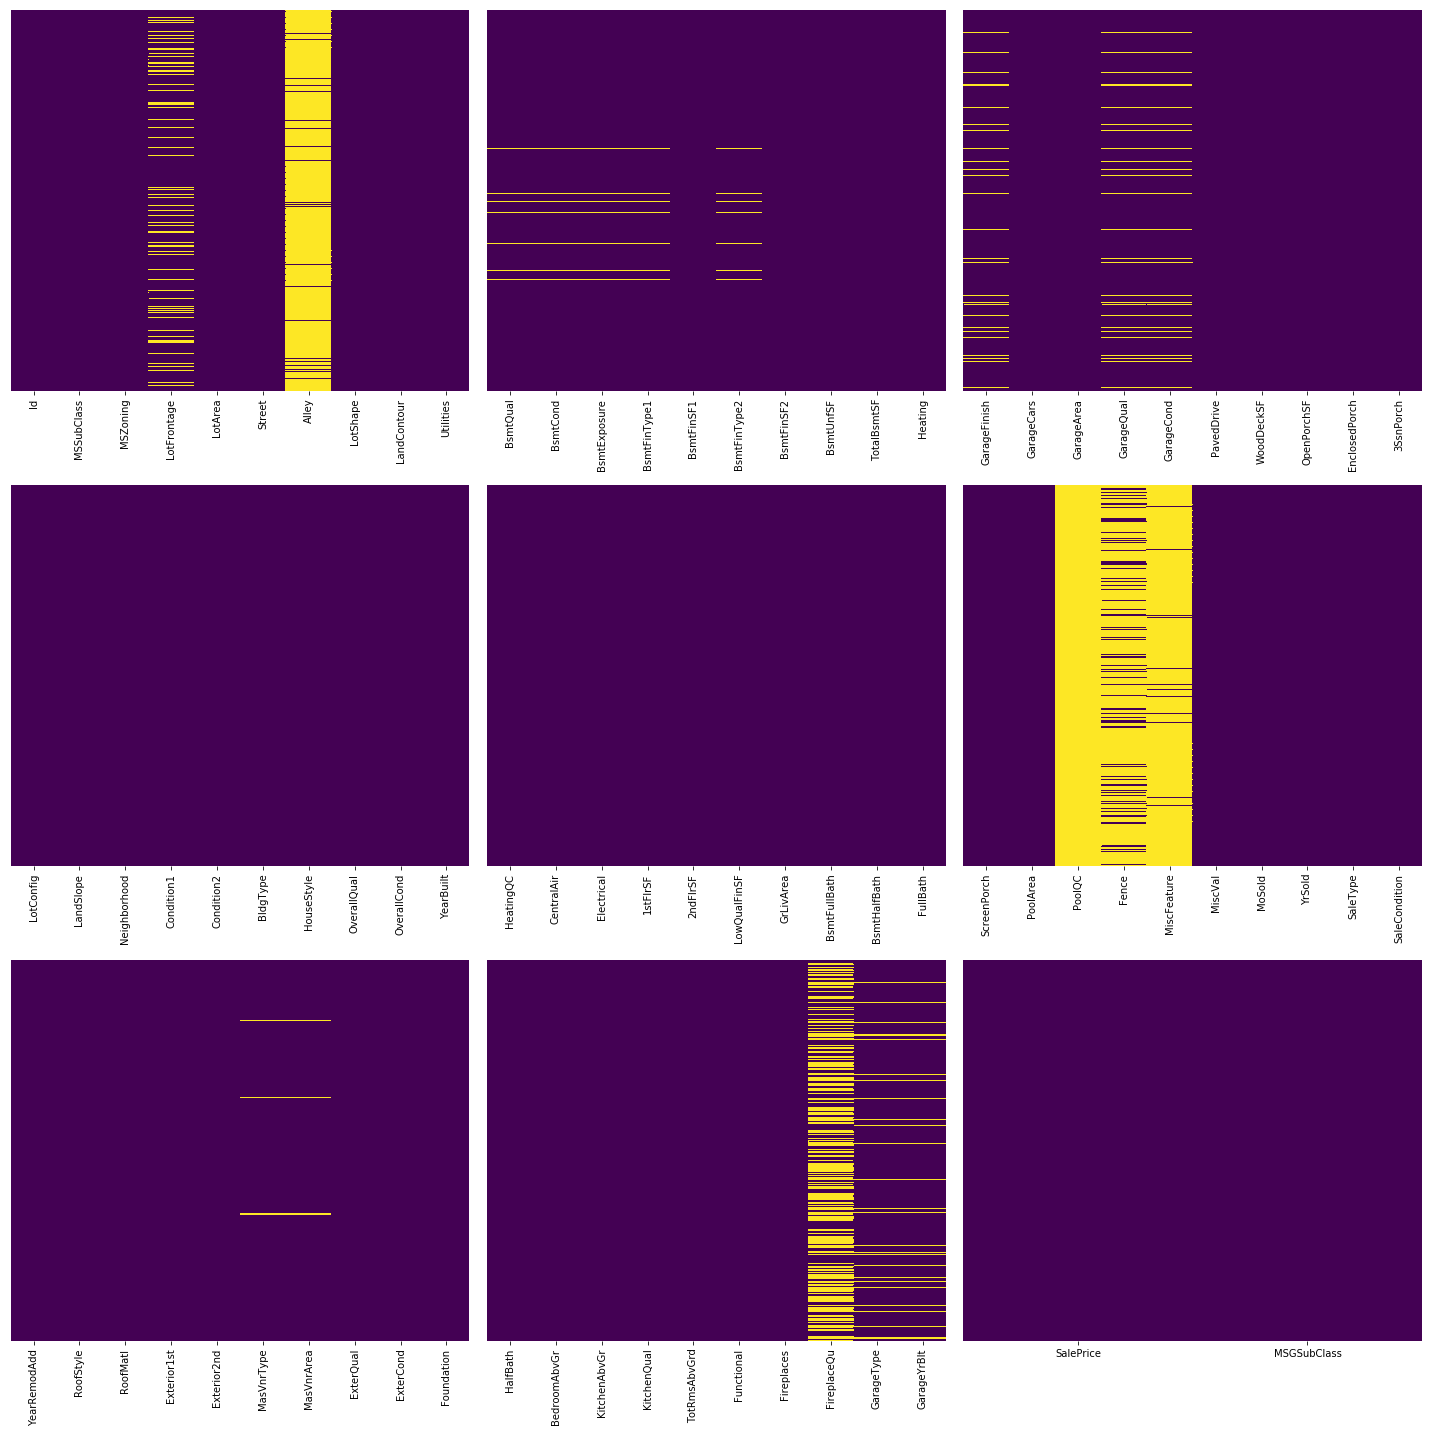

In [12]:
naxes = int(housePriceEDA.shape[1]/10 + 1)

naxes_x = int(np.sqrt(naxes))
naxes_y = naxes_x

fig,axes=plt.subplots(nrows = naxes_y, ncols=naxes_x)
fig.set_size_inches(20,20)

row = 0
col = 0

for i in range(naxes):
    row = i % naxes_y
    col = int((i - row)/naxes_y)
    if (col >= naxes_x) or (row >= naxes_y):
        continue
    sns.heatmap(data=housePriceEDA.iloc[:,i*10:i*10 + 10].isnull(),\
                yticklabels=False,cmap='viridis',cbar=False,ax=axes[row][col])


plt.tight_layout()

From the above we have the following:

Qualitative variables:
- MSSubClass
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- ExterQual
- ExterCond
- Foundation
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Heating
- HeatingQC
- CentralAir
- Electrical
- KitchenQual
- Functional
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- Fence
- MiscFeature
- SaleType
- SaleCondition

Quantitative Variables:
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold

Variables with null values:
- LotFrontage
- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature
- MasVnrType
- MasVnrArea
- FireplaceQu
- GarageType
- GarageYrBlt

In [13]:
dummy = pd.get_dummies(housePriceEDA['MSZoning'],drop_first=True)
newIndices = ['MSZoning' + col for col in dummy.columns]
dummy.columns = newIndices
dummy.head()

,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


#### Null GarageYrBlt values

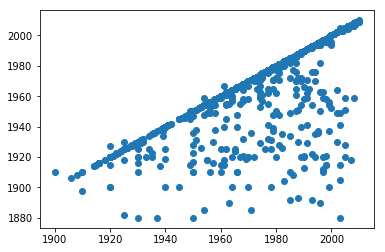

In [14]:
tempHousePriceEDA = housePriceEDA.dropna(subset=['GarageYrBlt']).reset_index().drop(columns=['index'])
plt.scatter(x=tempHousePriceEDA['GarageYrBlt'],y=tempHousePriceEDA['YearBuilt'])

#### Null LotFrontage values

A Null value for LotFrontage can just be replaced by the mean LotFrontage of all the houses. However, a more intuitive approach is to get the mean LotFrontage of similar houses instead. For example, if we were dealing with houses in London, it doesn't make that much sense to replace a house in Central London with the same LotFrontage mean as a house in South East London further away from the City. Below, we get the houses Building Type and Neighborhood and replace the Null LotFrontage by the mean of the houses with the same Building Type and Neighborhood. In cases where this Building Type and Neighborhood doesn't exist in the data set, we only look at the Neighborhood. In case this fails, we just return the mean of all houses.

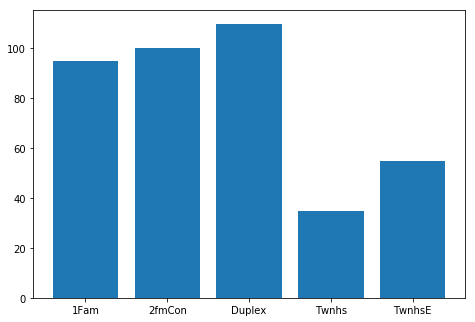

In [15]:
tempHousePriceEDA = housePriceEDA.dropna(subset=['LotFrontage']).reset_index().drop(columns=['index'])
# Group by mssubclass
grp = tempHousePriceEDA[['LotFrontage','BldgType','Neighborhood']].groupby(by=['BldgType','Neighborhood']).apply(np.mean).reset_index()
grp2 = tempHousePriceEDA[['LotFrontage','Neighborhood']].groupby(by=['Neighborhood']).apply(np.mean).reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(grp['BldgType'],grp['LotFrontage'])

values = list(grp.iloc[:,2])
values.extend(grp2.iloc[:,1])
keys = list(grp.iloc[:,0]+grp.iloc[:,1])
keys.extend(grp2.iloc[:,0])
dic = dict(zip(keys,values))

def getLotFrontage(x):
    if np.isnan(x[0]):
        if x[1] and x[2] and dic.get(x[1]+x[2]):
            return dic.get(x[1]+x[2])
        elif x[2] and dic.get(x[2]):
            return dic.get(x[2])
        else:
            return 0#np.mean(list(dic.values()))
    else:
        return x[0]

In [16]:
'''
tempHousePriceEDA = housePriceEDA.dropna(subset=['LotFrontage']).reset_index().drop(columns=['index'])
# Group by mssubclass
grp = tempHousePriceEDA[['LotFrontage','Neighborhood']].groupby(by=['Neighborhood']).apply(np.mean).reset_index()

values = list(grp.iloc[:,1])
keys = list(grp.iloc[:,0])
dic = dict(zip(keys,values))

def getLotFrontage(x):
    if np.isnan(x[0]):
        if x[1] and dic.get(x[1]):
            return dic.get(x[1])
        else:
            return np.mean(list(dic.values()))
    else:
        return x[0]
'''

"\ntempHousePriceEDA = housePriceEDA.dropna(subset=['LotFrontage']).reset_index().drop(columns=['index'])\n# Group by mssubclass\ngrp = tempHousePriceEDA[['LotFrontage','Neighborhood']].groupby(by=['Neighborhood']).apply(np.mean).reset_index()\n\nvalues = list(grp.iloc[:,1])\nkeys = list(grp.iloc[:,0])\ndic = dict(zip(keys,values))\n\ndef getLotFrontage(x):\n    if np.isnan(x[0]):\n        if x[1] and dic.get(x[1]):\n            return dic.get(x[1])\n        else:\n            return np.mean(list(dic.values()))\n    else:\n        return x[0]\n"

In [17]:
lfmodel = LinearRegression()
lfmodel.fit(X=tempHousePriceEDA['LotFrontage'].values.reshape(-1,1),y=tempHousePriceEDA['LotArea'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# TASKS

# Remove the ID column
# Create dummy variables for MSSubClass

qualVariables = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',\
    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',\
    'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',\
    'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',\
    'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',\
    'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',\
    'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','MSGSubClass']

def cleanAndTransform(x,original_df,qualVariables,trained_df = []):
    print('Cleaning and Transforming!!\n')
    df = x.copy()
    
    #df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
    
    # Form groups of MSSubClass using the groupMSSubClass function
    df['MSGSubClass'] = df['MSSubClass'].apply(groupMSSubClass)
    
    print('Replacing null values for GarageYrBlt with YearBuilt')
    df['GarageYrBlt'] = df[['GarageYrBlt','YearBuilt']].\
    apply(lambda x: x[1] if np.isnan(x[0]) else x[0],axis=1)
    
    print('Replacing null values for LotFrontage')
    df['LotFrontage'] = df[['LotFrontage','BldgType','Neighborhood']].\
    apply(lambda x: getLotFrontage(x),axis=1)
    
    '''
    print('Replacing null values for LotFrontage')
    df['LotFrontage'] = df[['LotFrontage','Neighborhood']].\
    apply(lambda x: getLotFrontage(x),axis=1)
    '''
    
    print('\nThese Quantitative values have their nulls replaced by mean:')
    # For each quantitative variable, fill the null values with the average for that variable
    for col in x.columns:
        if col not in qualVariables:
            print(col+'\n' if sum(pd.isna(df[col])) > 0 else '',end='')
            df[col] = df[col].apply(lambda x: original_df[col].mean() if np.isnan(x) else x)
    
    print('\nThese Qualitative values have nulls appended with column name + NA:')
    # Take care of null values generically
    for col in qualVariables:
        print(col+'\n' if sum(pd.isna(df[col])) > 0 else '',end='')
        df[col] = df[col].apply(lambda x: str(x))
        df[col] = df[col].apply(lambda x: col+'NA' if pd.isnull(x) else str(x))
        df[col] = df[col].apply(lambda x: col+'NA' if pd.isna(x) else str(x))
        
    # Create Higher Order features
    for col in ['OverallQual', 'GrLivArea', 'BsmtFinSF1','LotFrontage','MasVnrArea',
               'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea']:
        df[col+'Squared'] =  df[col].apply(lambda x: x*x)
    
    
        
    print('\nThe following columns have dummy variables created:')
    # For each qualitative variable, create dummy variables
    dummyVariables = []
    for col in qualVariables:
        if col not in ['RoofMatl','PoolQC','MiscFeature']:
            print(col)
            dummy = pd.get_dummies(df[col],drop_first=True)
            newIndices = [col + str(dummyCol) for dummyCol in dummy.columns]
            dummy.columns = newIndices
            dummyVariables.append(dummy)
    
    # Create dummy variables for all qualitative variables
    for dummy in dummyVariables:
        df = pd.concat([df,dummy],axis=1)
    
    # Drop columns
    df.drop(qualVariables,axis=1,inplace=True)
    
    # If the model has trained on a previous df, make sure the same dummy variables exist
    #df.apply(lambda x: [0 if pd.isna(i) else i for i in x])
    df_shape = df.iloc[:,0].shape
    if len(trained_df) > 0:
        print('\nAdding the following columns due to test train mismatch:')
        for colname in trained_df.columns:
            if colname not in df.columns:
                print(colname)
                df[colname] = pd.DataFrame(np.zeros(df_shape),columns=[colname])
    
    return df

In [19]:
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)
housePriceModel.head(10)

Cleaning and Transforming!!

Replacing null values for GarageYrBlt with YearBuilt
Replacing null values for LotFrontage

These Quantitative values have their nulls replaced by mean:
MasVnrArea

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
MSGSubClass


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial,MSGSubClassClass2,MSGSubClassClass3
0,1,65.000000,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,1,0,1,0
1,2,80.000000,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,1,0,0,0
2,3,68.000000,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,1,0,1,0
3,4,60.000000,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,0,0,0,0,0,1,0
4,5,84.000000,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,1,0,1,0
5,6,85.000000,14115,5,5,1993,1995,0.0,732,0,...,0,0,1,0,0,0,1,0,1,0
6,7,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,0,0,1,0,0,0,1,0,0,0
7,8,81.159091,10382,7,6,1973,1973,240.0,859,32,...,0,0,1,0,0,0,1,0,1,0
8,9,51.000000,6120,7,5,1931,1950,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,10,50.000000,7420,5,6,1939,1950,0.0,851,0,...,0,0,1,0,0,0,1,0,0,1


## Models

### Linear Regression

We will use forward selection to apply feature selection in order to form a parsimonious model. At each stage of the forward selection, we will use the $R^2$ metric in order to select the parameter and the adjusted $R^2$ metric to select the models.

#### A Single Predictor (LotFrontage)

In [20]:
# First set X to be the full set of remaining parameters. Here we only select the LotFrontage
# Note that .iloc copies data
X = housePriceModel.iloc[:,1]

# y is the response variable
y = housePriceModel['SalePrice']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# For each variable, we create the model and check the R^2 metric


In [21]:
# Let's check a few of the rows
X.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [22]:
# Add a Constant
X_new = sm.add_constant(np.asarray(X))

# Fit the linear regression model
linreg = sm.OLS(y, X_new)
linreg = linreg.fit()

# Get a summary
print(linreg.summary())
linreg.rsquared_adj

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     199.6
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           1.45e-42
Time:                        18:58:06   Log-Likelihood:                -18450.
No. Observations:                1460   AIC:                         3.690e+04
Df Residuals:                    1458   BIC:                         3.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.54e+04   6359.933     15.001      0.0

0.11979874691174819

#### Variable Selection

Next we do the following:
- Let 'fullParamList' contain all predictors
- Start with an empty model with no predictors
- Loop len(fullParamList) number of times (this is an outer loop)
- At each loop step, select the predictor in 'fullParamList' which results in the greatest R^2 value (this is an inner loop)
- Take note at each outer loop step which parameter was chosen

Note that at each outer loop step, the length of the model will increase by 1 as we choose the next best predictor to add to the model

In [23]:
# Full parameter list without the response and the Id columns
fullParamList = [colname for colname in housePriceModel.columns]
fullParamList = list(filter(lambda x: x not in ['Id','SalePrice'],fullParamList))

# y is the response variable
y = housePriceModel['SalePrice']

# For each variable, we create the model and check the R^2 metric
paramOrder = []
chosenVariables = []
variablesLeft = len(fullParamList)+1

# OUTER LOOP
while (len(fullParamList) > 0) and (variablesLeft != len(fullParamList)):
    variablesLeft = len(fullParamList)
    bestR2 = 0
    bestParam = ''
    
    # INNER LOOP
    for param in fullParamList:
        thisModelParams = chosenVariables.copy()
        thisModelParams.append(param)
        X = housePriceModel.loc[:,thisModelParams]

        # Add a Constant
        X_new = sm.add_constant(np.asarray(X))

        # Fit the linear regression model
        linreg = sm.OLS(y, X_new)
        linreg = linreg.fit()

        # If the adjusted R^2 is better than our best, save it
        if bestR2 < linreg.rsquared:
            bestR2 = linreg.rsquared
            bestParam = param

    # Save the best param as a tuple with its R^2
    paramOrder.append((bestR2,bestParam))

    # Add the best parameter to the model for good
    chosenVariables.append(bestParam)

    # Remove this parameter from the list
    fullParamList = list(filter(lambda x: x != bestParam,fullParamList))
    
    print('Chose {} with R^2 = {}, {} parameters left'.format(bestParam,bestR2,len(fullParamList)))

Chose OverallQualSquared with R^2 = 0.6677642652367046, 272 parameters left
Chose GrLivArea with R^2 = 0.7411548727427155, 271 parameters left
Chose BsmtFinSF1 with R^2 = 0.7681597347134386, 270 parameters left
Chose BsmtFinSF1Squared with R^2 = 0.793973192825407, 269 parameters left
Chose SaleTypeNew with R^2 = 0.8100243209790805, 268 parameters left
Chose OverallQual with R^2 = 0.820840250229377, 267 parameters left
Chose Condition2PosN with R^2 = 0.8334114461304027, 266 parameters left
Chose TotalBsmtSF with R^2 = 0.8437236583603924, 265 parameters left
Chose YearBuilt with R^2 = 0.8514455996834869, 264 parameters left
Chose OverallCond with R^2 = 0.8657392558178363, 263 parameters left
Chose LotArea with R^2 = 0.8728714558126135, 262 parameters left
Chose GarageCars with R^2 = 0.8762437845526667, 261 parameters left
Chose NeighborhoodCrawfor with R^2 = 0.8792304453730803, 260 parameters left
Chose MasVnrAreaSquared with R^2 = 0.8821390467870193, 259 parameters left
Chose KitchenAbv

Chose MasVnrTypeBrkFace with R^2 = 0.9278552459951247, 157 parameters left
Chose SaleConditionAlloca with R^2 = 0.92791971368862, 156 parameters left
Chose NeighborhoodTimber with R^2 = 0.9279776716236132, 155 parameters left
Chose NeighborhoodNWAmes with R^2 = 0.9280349663169974, 154 parameters left
Chose NeighborhoodNAmes with R^2 = 0.9281094141444014, 153 parameters left
Chose FireplaceQuFa with R^2 = 0.928165957076722, 152 parameters left
Chose ExterQualGd with R^2 = 0.92822156216499, 151 parameters left
Chose ExterQualTA with R^2 = 0.9283662591268883, 150 parameters left
Chose ExterQualFa with R^2 = 0.9284860105231223, 149 parameters left
Chose MSZoningRH with R^2 = 0.928543525495579, 148 parameters left
Chose MSZoningRM with R^2 = 0.9288814585828223, 147 parameters left
Chose SaleTypeConLD with R^2 = 0.9289853505712844, 146 parameters left
Chose NeighborhoodOldTown with R^2 = 0.9290375391666933, 145 parameters left
Chose LandContourHLS with R^2 = 0.9290925806575396, 144 parameter

Chose NeighborhoodSWISU with R^2 = 0.9322950286618652, 42 parameters left
Chose NeighborhoodMeadowV with R^2 = 0.932299734555158, 41 parameters left
Chose NeighborhoodIDOTRR with R^2 = 0.932315217872245, 40 parameters left
Chose Exterior2ndCmentBd with R^2 = 0.9323212014589217, 39 parameters left
Chose Exterior2ndWd Sdng with R^2 = 0.932328678468728, 38 parameters left
Chose Exterior1stWd Sdng with R^2 = 0.9323342510372701, 37 parameters left
Chose Exterior2ndVinylSd with R^2 = 0.9323405660566999, 36 parameters left
Chose Exterior2ndStucco with R^2 = 0.932343878582231, 35 parameters left
Chose Exterior1stStucco with R^2 = 0.932350008831248, 34 parameters left
Chose Exterior1stCemntBd with R^2 = 0.9323562962013838, 33 parameters left
Chose Exterior1stBrkComm with R^2 = 0.9323622345499836, 32 parameters left
Chose ElectricalFuseP with R^2 = 0.9323657949552594, 31 parameters left
Chose BldgType2fmCon with R^2 = 0.9323681839367803, 30 parameters left
Chose MSSubClass45 with R^2 = 0.9323704

In the above code, 'paramOrder' stored the order in which the parameters were added to the model - from the greatest contribution to the R^2 at each step. Below, we can see the top 10 parameters and their R^2 value once they were added.

In [24]:
paramOrder[:10]

[(0.6677642652367046, 'OverallQualSquared'),
 (0.7411548727427155, 'GrLivArea'),
 (0.7681597347134386, 'BsmtFinSF1'),
 (0.793973192825407, 'BsmtFinSF1Squared'),
 (0.8100243209790805, 'SaleTypeNew'),
 (0.820840250229377, 'OverallQual'),
 (0.8334114461304027, 'Condition2PosN'),
 (0.8437236583603924, 'TotalBsmtSF'),
 (0.8514455996834869, 'YearBuilt'),
 (0.8657392558178363, 'OverallCond')]

This translates to: OverallQual provided the best R^2 value out of all the predictors. GrLivArea provided the best R^2 value out of all the remaining predictors when included along with OverallQual, BsmtFinSF1 provided the best R^2 values out of all the remaining predictors when included along with OverallQual and GrLivArea and so on...

So in order of increasing R^2, we have the following models by looking at paramOrder:
- OverallQual
- OverallQual,GrLivArea
- OverallQual,GrLivArea,BsmtFinSF1
- OverallQual,GrLivArea,BsmtFinSF1,GarageCars
- OverallQual,GrLivArea,BsmtFinSF1,GarageCars,NeighborhoodNridgHt
.
.
.
And so on.

At this point we have 2 ways of deciding which model to choose:
1- Which one has the best Adjusted R^2
2- Which one has the best R^2 (or MSE) using Cross Validation

Adjusted R^2 is meant to estimate the test set error and is useful if computational resources are low. Let's start with 1:

#### Adjusted R^2 (model selection)

In [25]:
# paramOrder now contains the parameters in the order of maximum R^2
# next we test each model and get the max adjusted R^2

# paramOrder is a tuple at each index. We only need the name
allParametersInOrder = [param for index,param in paramOrder]

thisModel = []

chosenVariables = []
variablesLeft = len(fullParamList)+1


bestAdjR2 = 0
bestModelArray = []

# Incrementally increase the model using paramOrder and calculate adjusted R^2 for each - choose the one with the best adj R^2
for param in allParametersInOrder:
    thisModel.append(param)
    X = housePriceModel.loc[:,thisModel]

    # Add a Constant
    X_new = sm.add_constant(np.asarray(X))

    # Fit the linear regression model
    linreg = sm.OLS(y, X_new)
    linreg = linreg.fit()

    # If the adjusted R^2 is better than our best, save it
    if bestAdjR2 < linreg.rsquared_adj:
        bestAdjR2 = linreg.rsquared_adj
        bestModelArray = thisModel.copy()   

    print('Model size is {}, adj R^2 is {}'.format(len(thisModel),linreg.rsquared_adj))
        
    
        

Model size is 1, adj R^2 is 0.6675363943623813
Model size is 2, adj R^2 is 0.7407995602825134
Model size is 3, adj R^2 is 0.7676820418591394
Model size is 4, adj R^2 is 0.7934067961046521
Model size is 5, adj R^2 is 0.809371034600054
Model size is 6, adj R^2 is 0.820100430202795
Model size is 7, adj R^2 is 0.832608333267395
Model size is 8, adj R^2 is 0.8428620382824346
Model size is 9, adj R^2 is 0.8505235378884188
Model size is 10, adj R^2 is 0.8648126806336943
Model size is 11, adj R^2 is 0.8719057002973778
Model size is 12, adj R^2 is 0.8752174717777061
Model size is 13, adj R^2 is 0.8781446886579005
Model size is 14, adj R^2 is 0.8809971413579661
Model size is 15, adj R^2 is 0.883505653500106
Model size is 16, adj R^2 is 0.8859967569961463
Model size is 17, adj R^2 is 0.8877701872066499
Model size is 18, adj R^2 is 0.8895312314478048
Model size is 19, adj R^2 is 0.8914427917717334
Model size is 20, adj R^2 is 0.8938504161066811
Model size is 21, adj R^2 is 0.8950503468391405
Model

Model size is 171, adj R^2 is 0.9220864050839919
Model size is 172, adj R^2 is 0.9220476714692634
Model size is 173, adj R^2 is 0.9220110609881581
Model size is 174, adj R^2 is 0.9219718265467831
Model size is 175, adj R^2 is 0.9219297658780685
Model size is 176, adj R^2 is 0.9218873977740342
Model size is 177, adj R^2 is 0.9218470055441282
Model size is 178, adj R^2 is 0.9218089041871633
Model size is 179, adj R^2 is 0.9217682612104524
Model size is 180, adj R^2 is 0.9217256945203308
Model size is 181, adj R^2 is 0.9216859727877231
Model size is 182, adj R^2 is 0.921659717831169
Model size is 183, adj R^2 is 0.9216188701485764
Model size is 184, adj R^2 is 0.9215754037678728
Model size is 185, adj R^2 is 0.9216313112992578
Model size is 186, adj R^2 is 0.921588894410234
Model size is 187, adj R^2 is 0.921545603956622
Model size is 188, adj R^2 is 0.9215022883533877
Model size is 189, adj R^2 is 0.9214548939462999
Model size is 190, adj R^2 is 0.9214196520990404
Model size is 191, adj 

In [26]:
print('\n\nThe best model is {} \n\nIts adjusted R^2 is {}'.format(bestModelArray,bestAdjR2))



The best model is ['OverallQualSquared', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF1Squared', 'SaleTypeNew', 'OverallQual', 'Condition2PosN', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'LotArea', 'GarageCars', 'NeighborhoodCrawfor', 'MasVnrAreaSquared', 'KitchenAbvGr', 'BsmtExposureGd', 'MSSubClass160', 'NeighborhoodNridgHt', 'NeighborhoodNoRidge', 'NeighborhoodStoneBr', 'Exterior1stBrkFace', 'MSGSubClassClass3', '2ndFlrSFSquared', '1stFlrSF', 'FoundationPConc', 'BsmtQualGd', 'BsmtQualTA', 'Fireplaces', 'FunctionalTyp', 'TotalBsmtSFSquared', 'BsmtQualFa', 'NeighborhoodSomerst', 'Condition1Norm', 'LandSlopeSev', 'BedroomAbvGr', 'NeighborhoodBrkSide', 'PoolArea', 'SaleConditionNormal', 'MSSubClass190', 'ScreenPorch', 'TotRmsAbvGrd', 'LotConfigCulDSac', 'MasVnrTypeNone', 'WoodDeckSF', 'NeighborhoodMitchel', 'StreetPave', 'HeatingOthW', 'Exterior2ndImStucc', 'YearRemodAdd', 'KitchenQualGd', 'KitchenQualTA', 'KitchenQualFa', 'BsmtCondTA', 'FunctionalSev', 'SaleTypeCon', 'GarageAreaSquared', 'G

In [27]:
len(bestModelArray)

160

We now have the best model selected via adjusted R^2. Let's perform a quick train test split to see how it performs when trained on a train set and tested on a test set. These results here are discarded and are meant just for curiousity.

In [28]:
# First set X to be the full set of remaining parameters
X = housePriceModel.loc[:,bestModelArray]

# y is the response variable
y = housePriceModel['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
predictions = lm.predict(X_test)

r2_score(y_test,predictions)

0.8851529478828555

#### Cross Validation (model selection)

Below we estimate the test set R^2 when we include all the predictors as an example of an application of Cross Validation

In [30]:
# Run cross validation to estimate the test set error
linregCVScores = cross_val_score(LinearRegression(),X,y,scoring='r2',cv=10)

# Get the mean R^2
linregCVScores.mean()

0.8017592613747496

In [31]:
len(X)

1460

Next we do the Cross Validation as above but for each of the models in allParametersInOrder and select the model with the best Cross Validation score

In [32]:
# Run through each model in the correct order and run CV on it and save the best CV score

bestMeanCV = 0
bestMeanCVModel = []

# y is the response variable
y = housePriceModel['SalePrice']

for i in range(1,len(allParametersInOrder)):
    # Print progress 10 times
    if i%(int(len(allParametersInOrder)/10)) ==0:
        print('{} out of {}'.format(i,len(allParametersInOrder)))
        
    # First set X to be the full set of remaining parameters
    X = housePriceModel.loc[:,allParametersInOrder[0:i]]

    linregCVScores = cross_val_score(LinearRegression(),X,y,scoring='r2',cv=10)
    
    if bestMeanCV < linregCVScores.mean():
        bestMeanCV = linregCVScores.mean()
        bestMeanCVModel = bestModelArray[0:i]
        
print('The final best model is {} and its TEST R^2 is {}'.format(bestMeanCVModel,bestMeanCV))

27 out of 273
54 out of 273
81 out of 273
108 out of 273
135 out of 273
162 out of 273
189 out of 273
216 out of 273
243 out of 273
270 out of 273
The final best model is ['OverallQualSquared', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF1Squared', 'SaleTypeNew', 'OverallQual', 'Condition2PosN', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'LotArea', 'GarageCars', 'NeighborhoodCrawfor', 'MasVnrAreaSquared', 'KitchenAbvGr', 'BsmtExposureGd', 'MSSubClass160', 'NeighborhoodNridgHt', 'NeighborhoodNoRidge', 'NeighborhoodStoneBr', 'Exterior1stBrkFace', 'MSGSubClassClass3', '2ndFlrSFSquared', '1stFlrSF', 'FoundationPConc', 'BsmtQualGd', 'BsmtQualTA', 'Fireplaces', 'FunctionalTyp', 'TotalBsmtSFSquared', 'BsmtQualFa', 'NeighborhoodSomerst', 'Condition1Norm', 'LandSlopeSev', 'BedroomAbvGr', 'NeighborhoodBrkSide', 'PoolArea', 'SaleConditionNormal', 'MSSubClass190', 'ScreenPorch', 'TotRmsAbvGrd', 'LotConfigCulDSac', 'MasVnrTypeNone', 'WoodDeckSF', 'NeighborhoodMitchel', 'StreetPave', 'HeatingOthW', 'Exteri

The best performing model is now in bestMeanCVModel. The following shows that we have the best model by confirming its R^2

In [33]:
X = housePriceModel.loc[:,bestMeanCVModel]
linregCVScores = cross_val_score(LinearRegression(),X,y,scoring='r2',cv=10)
linregCVScores.mean()

0.8358565552906663

Below we train the model on all the training data we have and produce predictions for the new data

In [34]:
# Apply the same cleaning and transformations using the function above
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)

# Get the columns corresponding to the best model
X = housePriceModel.loc[:,bestMeanCVModel]

# Fit the model
lm = LinearRegression()
lm.fit(X,y)

# And apply it to the new data
X_test = pd.read_csv(testLocation)
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables,housePriceModel)
predictions = lm.predict(X_test_cleaned.loc[:,bestMeanCVModel])


Cleaning and Transforming!!

Replacing null values for GarageYrBlt with YearBuilt
Replacing null values for LotFrontage

These Quantitative values have their nulls replaced by mean:
MasVnrArea

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
MSGSubClass
Cleaning and Transforming!!

Replacing null values for GarageYrBlt with 

In [35]:
# Check that the cleaning didn't remove data
print(len(X_test) == len(X_test_cleaned))

# Check that the model didn't remove data
print(len(predictions) == len(X_test))

True
True


Let's now save the predictions to a file along with the Id column and predicted sale price

In [36]:
linearRegressionSaveLocation = os.path.join(Directory.outputPath,'LinearRegression_Predictions.csv')

LinReg = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
LinReg.to_csv(linearRegressionSaveLocation,index=False)

In [37]:
params = {'fit_intercept':[True,False],'normalize':[True,False]}

gscv = GridSearchCV(LinearRegression(),params,scoring='r2',cv=10)
gscv.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [38]:
gscv.best_score_

0.8372372131416108

In [39]:
lrm = cross_val_score(LinearRegression(normalize=True),X,y=y,scoring='r2',cv=10)

In [40]:
lrm = list(filter(lambda x: x> 0,lrm))

In [41]:
np.mean(lrm)

0.8358565562049989

In [42]:
lm2 = LinearRegression(normalize=True)
lm2.fit(X,y)
predictions2 = lm2.predict(X_test_cleaned.loc[:,bestMeanCVModel])

In [43]:
predictions2

array([119494.00748984, 162646.31925327, 184725.69448432, ...,
       158537.78234171, 116767.17846387, 222994.22590649])

In [44]:
predictions

array([119494.0075039 , 162646.31926127, 184725.69448536, ...,
       158537.78237648, 116767.17846855, 222994.22586668])

In [45]:
linearRegressionSaveLocation2 = os.path.join(Directory.outputPath,'LinearRegression_Predictions2.csv')

LinReg2 = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions2,columns=['SalePrice'])],axis=1)
LinReg2.to_csv(linearRegressionSaveLocation2,index=False)

In [46]:
gb = X_test[['Id','MSSubClass','LotFrontage','LotArea']].groupby(by=['Id']).\
agg({'MSSubClass':lambda x: sum(pd.isna(x)),'LotFrontage':lambda x: sum(pd.isna(x)),'LotArea':lambda x: sum(pd.isna(x))})

In [47]:
gb.head()

,MSSubClass,LotFrontage,LotArea
Id,,,
1461,0,0.0,0
1462,0,0.0,0
1463,0,0.0,0
1464,0,0.0,0
1465,0,0.0,0


In [48]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Lasso Regression

In [49]:
lassomodel = Lasso()
lassomodel.fit(X,y)
r2_score(lassomodel.predict(X),y)

0.9130640581963776

In [50]:
# Full parameter list without the response and the Id columns
fullParamList = [colname for colname in housePriceModel.columns]
fullParamList = list(filter(lambda x: x not in ['Id','SalePrice'],fullParamList))

# y is the response variable
y = housePriceModel['SalePrice']

# For each variable, we create the model and check the R^2 metric
paramOrder = []
chosenVariables = []
variablesLeft = len(fullParamList)+1

# OUTER LOOP
while (len(fullParamList) > 0) and (variablesLeft != len(fullParamList)):
    variablesLeft = len(fullParamList)
    bestR2 = 0
    bestParam = ''
    
    # INNER LOOP
    for param in fullParamList:
        thisModelParams = chosenVariables.copy()
        thisModelParams.append(param)
        X = housePriceModel.loc[:,thisModelParams]

        # Fit the linear regression model
        lassomodel = Lasso()
        lassomodel.fit(X,y)

        # If the adjusted R^2 is better than our best, save it
        r2 = r2_score(lassomodel.predict(X),y)
        if bestR2 < r2:
            bestR2 = r2
            bestParam = param

    # Save the best param as a tuple with its R^2
    paramOrder.append((bestR2,bestParam))

    # Add the best parameter to the model for good
    chosenVariables.append(bestParam)

    # Remove this parameter from the list
    fullParamList = list(filter(lambda x: x != bestParam,fullParamList))
    
    print('Chose {} with R^2 = {}, {} parameters left'.format(bestParam,bestR2,len(fullParamList)))

Chose OverallQualSquared with R^2 = 0.5024646610301665, 272 parameters left
Chose GrLivArea with R^2 = 0.6507543060653912, 271 parameters left
Chose BsmtFinSF1 with R^2 = 0.6981872937262558, 270 parameters left
Chose BsmtFinSF1Squared with R^2 = 0.7405113510823751, 269 parameters left
Chose SaleTypeNew with R^2 = 0.7654653401072555, 268 parameters left
Chose OverallQual with R^2 = 0.7817292584882222, 267 parameters left
Chose Condition2PosN with R^2 = 0.8000866209473294, 266 parameters left
Chose TotalBsmtSF with R^2 = 0.814754334294902, 265 parameters left
Chose YearBuilt with R^2 = 0.8255053300937897, 264 parameters left
Chose OverallCond with R^2 = 0.8448972704978314, 263 parameters left
Chose LotArea with R^2 = 0.854336623386414, 262 parameters left
Chose GarageCars with R^2 = 0.8587462957141708, 261 parameters left
Chose NeighborhoodCrawfor with R^2 = 0.8626223276897458, 260 parameters left
Chose MasVnrAreaSquared with R^2 = 0.866372722263479, 259 parameters left
Chose KitchenAbvG

Chose MasVnrTypeBrkFace with R^2 = 0.9221940895312217, 157 parameters left
Chose SaleConditionAlloca with R^2 = 0.9222686227137681, 156 parameters left
Chose NeighborhoodTimber with R^2 = 0.9223358414469507, 155 parameters left
Chose NeighborhoodNWAmes with R^2 = 0.9224023415663639, 154 parameters left
Chose NeighborhoodNAmes with R^2 = 0.9224888732313985, 153 parameters left
Chose FireplaceQuFa with R^2 = 0.9225544593655068, 152 parameters left
Chose ExterQualGd with R^2 = 0.9226188684648113, 151 parameters left
Chose ExterQualTA with R^2 = 0.9227864855722094, 150 parameters left
Chose ExterQualFa with R^2 = 0.9229251849615661, 149 parameters left
Chose MSZoningRH with R^2 = 0.9229916863802484, 148 parameters left
Chose MSZoningRM with R^2 = 0.9233815798883803, 147 parameters left
Chose SaleTypeConLD with R^2 = 0.9235013603204516, 146 parameters left
Chose NeighborhoodOldTown with R^2 = 0.9235618830262614, 145 parameters left
Chose LandContourHLS with R^2 = 0.9236256506248796, 144 par

Chose NeighborhoodMeadowV with R^2 = 0.9272354299688988, 42 parameters left
Chose NeighborhoodIDOTRR with R^2 = 0.927252796317779, 41 parameters left
Chose Exterior2ndCmentBd with R^2 = 0.9272592924098104, 40 parameters left
Chose Exterior2ndWd Sdng with R^2 = 0.9272680701847127, 39 parameters left
Chose Exterior1stWd Sdng with R^2 = 0.9272751305237767, 38 parameters left
Chose Exterior2ndVinylSd with R^2 = 0.927281880082314, 37 parameters left
Chose PavedDriveY with R^2 = 0.9272850154874356, 36 parameters left
Chose Exterior2ndStucco with R^2 = 0.9272880255010123, 35 parameters left
Chose Exterior1stStucco with R^2 = 0.9272939705648664, 34 parameters left
Chose Exterior1stCemntBd with R^2 = 0.9272972733471884, 33 parameters left
Chose Exterior1stBrkComm with R^2 = 0.9273005495416234, 32 parameters left
Chose CentralAirY with R^2 = 0.9273032999335459, 31 parameters left
Chose Condition2Norm with R^2 = 0.927305663729703, 30 parameters left
Chose MSSubClass45 with R^2 = 0.927310382409958

In [51]:
# Run through each model in the correct order and run CV on it and save the best CV score

bestMeanCV = 0
bestMeanCVModel = []

# y is the response variable
y = housePriceModel['SalePrice']

for i in range(1,len(chosenVariables)):
    # First set X to be the full set of remaining parameters
    X = housePriceModel.loc[:,chosenVariables[0:i]]

    lassoCVScores = cross_val_score(Lasso(),X,y,scoring='r2',cv=10)
    
    if bestMeanCV < lassoCVScores.mean():
        bestMeanCV = lassoCVScores.mean()
        bestMeanCVModel = chosenVariables[0:i]
        
print('The final best model is {} and its TEST R^2 is {}'.format(bestMeanCVModel,bestMeanCV))

The final best model is ['OverallQualSquared', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF1Squared', 'SaleTypeNew', 'OverallQual', 'Condition2PosN', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'LotArea', 'GarageCars', 'NeighborhoodCrawfor', 'MasVnrAreaSquared', 'KitchenAbvGr', 'BsmtExposureGd', 'MSSubClass160', 'NeighborhoodNridgHt', 'NeighborhoodNoRidge', 'NeighborhoodStoneBr', 'Exterior1stBrkFace', 'MSGSubClassClass3', '2ndFlrSFSquared', '1stFlrSF', 'FoundationPConc', 'BsmtQualGd', 'BsmtQualTA', 'Fireplaces', 'FunctionalTyp', 'TotalBsmtSFSquared', 'BsmtQualFa', 'NeighborhoodSomerst', 'Condition1Norm', 'LandSlopeSev', 'BedroomAbvGr', 'NeighborhoodBrkSide', 'PoolArea', 'SaleConditionNormal', 'MSSubClass190', 'ScreenPorch', 'TotRmsAbvGrd', 'LotConfigCulDSac', 'MasVnrTypeNone', 'WoodDeckSF', 'NeighborhoodMitchel', 'StreetPave', 'HeatingOthW', 'Exterior2ndImStucc', 'YearRemodAdd', 'KitchenQualGd', 'KitchenQualTA', 'KitchenQualFa', 'BsmtCondTA', 'FunctionalSev', 'SaleTypeCon'] and its TEST R^2 is

In [52]:
# Apply the same cleaning and transformations using the function above
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)

# Get the columns corresponding to the best model
X = housePriceModel.loc[:,bestMeanCVModel]

# Fit the model
lassom = Lasso()
lassom.fit(X,y)

# And apply it to the new data
X_test = pd.read_csv(testLocation)
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables,housePriceModel)
predictions = lassom.predict(X_test_cleaned.loc[:,bestMeanCVModel])

Cleaning and Transforming!!

Replacing null values for GarageYrBlt with YearBuilt
Replacing null values for LotFrontage

These Quantitative values have their nulls replaced by mean:
MasVnrArea

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
MSGSubClass
Cleaning and Transforming!!

Replacing null values for GarageYrBlt with 

In [53]:
# Check that the cleaning didn't remove data
print(len(X_test) == len(X_test_cleaned))

# Check that the model didn't remove data
print(len(predictions) == len(X_test))

True
True


In [54]:
lassoRegressionSaveLocation = os.path.join(Directory.outputPath,'Lasso_Predictions.csv')

LasReg = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
LasReg.to_csv(lassoRegressionSaveLocation,index=False)

### Ridge Regression

Ridge Regression can be great at reducing the variance of the model predictions as well as dealing with multicollinearity. Here, we will run through the following process:

<ol>

    <li>Using the training set, choose a metric to determine how well the model is doing amongst other versions of itself (i.e. R^2, Adjusted R^2, test R^2, test MSE etc...)</li>
    <li>Start with an empty list of features and add one feature at a time to your model depending on which of the remaining features improve your chosen metric at each step</li>
    <li>Continue until your chosen metric no longer improves with the addition of any of the remaining features</li>
    <li>(Only using model_arena.RidgeRegression class) Use the final list of features to optimise for alpha (the shrinkage factor)</li>
    <li>Fit the final model</li>
    <li>Save a csv of the predicted results of the test set</li>

</ol>
  

In [55]:
# Simple application

# Assign X and y
X = housePriceModel.drop('SalePrice',axis=1)
y = housePriceModel['SalePrice']

# Create a Ridge object
ridgemodel = Ridge()

# Fit the Ridge object to the data
ridgemodel.fit(X,y)

# Display the R^2
print('R^2 for Ridge Regression using all features (alpha = 1) = %s' % r2_score(ridgemodel.predict(X),y))

R^2 for Ridge Regression using all features (alpha = 1) = 0.924075197902955


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.26648e-17): result may not be accurate.
  overwrite_a=True).T


It's simple enough to just fit a Ridge model but overfitting may be an issue and one way we can reduce this in our model is to test on a test set during our decision to include features

In [56]:
# 0- Set up variables

# Assign X and y
X = housePriceModel.drop('SalePrice',axis=1)
y = housePriceModel['SalePrice']

# 1- Chosen metric = R^2 (note, R^2 will always improve with more features)
metric = 'r2'
print('***************************\n1-Chosen Metric = R^2\n****************************')

# 2 and 3- Start with empty list (paramOrder and chosenVariables) and add one feature at a time
print('***************************\n2 and 3-Selecting best order of features\n')


# Full parameter list without the response and the Id columns
fullParamList = [colname for colname in housePriceModel.columns]
fullParamList = list(filter(lambda x: x not in ['Id','SalePrice'],fullParamList))


# For each variable, we create the model and check the R^2 metric
paramOrder = []
chosenVariables = []
variablesLeft = len(fullParamList)+1

# OUTER LOOP - while we haven't yet exhausted all the features
while (len(fullParamList) > 0) and (variablesLeft != len(fullParamList)):
    variablesLeft = len(fullParamList)
    bestR2 = 0
    bestParam = ''
    
    # INNER LOOP - for each remaining feature, see which one increases the R^2 most
    for param in fullParamList:
        # Test this set of features to see if it has improved the R^2 the most
        thisModelParams = chosenVariables.copy()
        thisModelParams.append(param)
        X = housePriceModel.loc[:,thisModelParams]

        # Fit the linear regression model
        ridgemodel = Ridge()
        ridgemodel.fit(X,y)

        # If the adjusted R^2 is better than our best, save it
        r2 = r2_score(ridgemodel.predict(X),y)
        if bestR2 < r2:
            bestR2 = r2
            bestParam = param

    # Save the best param as a tuple with its R^2
    paramOrder.append((bestR2,bestParam))

    # Add the best parameter to the model for good
    chosenVariables.append(bestParam)

    # Remove this parameter from the list
    fullParamList = list(filter(lambda x: x != bestParam,fullParamList))
    
    print('Chose {} with R^2 = {}, {} parameters left'.format(bestParam,bestR2,len(fullParamList)))
    
print('****************************')

# 2 and 3 again- Go through the list of features added in the same resulting order as above and choose the model with the best test R^2
print('***************************\n2 and 3 again-Selecting best model\n')

# Run through each model in the correct order and run CV on it and save the best CV score

bestMeanCV = 0
bestMeanCVModel = []

# Assign X and y
X = housePriceModel.drop('SalePrice',axis=1)
y = housePriceModel['SalePrice']

for i in range(1,len(chosenVariables)):
    # Print progress 10 times
    if i%(int(len(chosenVariables)/10)) ==0:
        print('{} out of {}'.format(i,len(chosenVariables)))
        
    # First set X to be the full set of remaining parameters
    X = housePriceModel.loc[:,chosenVariables[0:i]]

    ridgeCVScores = cross_val_score(Ridge(),X,y,scoring=metric,cv=30)
    
    if bestMeanCV < ridgeCVScores.mean():
        bestMeanCV = ridgeCVScores.mean()
        bestMeanCVModel = chosenVariables[0:i]
        
print('The final best model is {} and its TEST R^2 is {}'.format(bestMeanCVModel,bestMeanCV))

print('****************************')

print('***************************\n5-Fit the final/best model\n')

# Apply the same cleaning and transformations using the function above
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)

# Get the columns corresponding to the best model
X = housePriceModel.loc[:,bestMeanCVModel]

# Fit the model
ridgem = Ridge()
ridgem.fit(X,y)

# And apply it to the new data
X_test = pd.read_csv(testLocation)
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables,housePriceModel)
predictions = ridgem.predict(X_test_cleaned.loc[:,bestMeanCVModel])

print('****************************')

print('***************************\n6-Save predictions on test set\n')

RidgeRegressionSaveLocation1 = os.path.join(Directory.outputPath,'Ridge_Predictions1.csv')

RidReg = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
RidReg.to_csv(RidgeRegressionSaveLocation1,index=False)

print('****************************')

***************************
1-Chosen Metric = R^2
****************************
***************************
2 and 3-Selecting best order of features

Chose OverallQualSquared with R^2 = 0.5024633104994529, 272 parameters left
Chose GrLivArea with R^2 = 0.6507535420113759, 271 parameters left
Chose BsmtFinSF1 with R^2 = 0.6981868412243252, 270 parameters left
Chose BsmtFinSF1Squared with R^2 = 0.7405111514006053, 269 parameters left
Chose SaleTypeNew with R^2 = 0.7653716944712188, 268 parameters left
Chose OverallQual with R^2 = 0.7815652016105695, 267 parameters left
Chose GarageCars with R^2 = 0.7971535874447948, 266 parameters left
Chose Condition2PosN with R^2 = 0.8105676042101058, 265 parameters left
Chose TotalBsmtSF with R^2 = 0.8221693275030498, 264 parameters left
Chose OverallCond with R^2 = 0.8320463970847781, 263 parameters left
Chose YearBuilt with R^2 = 0.8472630299305516, 262 parameters left
Chose LotArea with R^2 = 0.8556823446960011, 261 parameters left
Chose Neighborhoo

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.10422e-16): result may not be accurate.
  overwrite_a=True).T


Chose MSZoningFV with R^2 = 0.9184935698688517, 170 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.10071e-16): result may not be accurate.
  overwrite_a=True).T


Chose Exterior2ndWd Sdng with R^2 = 0.9185650126441491, 169 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.09822e-16): result may not be accurate.
  overwrite_a=True).T


Chose Exterior2ndVinylSd with R^2 = 0.9186709750863454, 168 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.09073e-16): result may not be accurate.
  overwrite_a=True).T


Chose NeighborhoodSawyerW with R^2 = 0.9187702803883898, 167 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.08794e-16): result may not be accurate.
  overwrite_a=True).T


Chose NeighborhoodVeenker with R^2 = 0.9188674918870602, 166 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.08446e-16): result may not be accurate.
  overwrite_a=True).T


Chose EnclosedPorch with R^2 = 0.9189366463515941, 165 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.08386e-16): result may not be accurate.
  overwrite_a=True).T


Chose FireplaceQuFa with R^2 = 0.9190066495149902, 164 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.08347e-16): result may not be accurate.
  overwrite_a=True).T


Chose FenceMnPrv with R^2 = 0.919073866661554, 163 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.08212e-16): result may not be accurate.
  overwrite_a=True).T


Chose BsmtFinType2BLQ with R^2 = 0.9191350090383622, 162 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.07072e-16): result may not be accurate.
  overwrite_a=True).T


Chose MSZoningRL with R^2 = 0.9191975988230788, 161 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.0706e-16): result may not be accurate.
  overwrite_a=True).T


Chose MSZoningRM with R^2 = 0.9193317525199141, 160 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.06737e-16): result may not be accurate.
  overwrite_a=True).T


Chose MSZoningRH with R^2 = 0.9196408359574799, 159 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.0675e-16): result may not be accurate.
  overwrite_a=True).T


Chose Condition2Feedr with R^2 = 0.9197386177013658, 158 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.06608e-16): result may not be accurate.
  overwrite_a=True).T


Chose Condition2RRNn with R^2 = 0.9198526799803103, 157 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.06452e-16): result may not be accurate.
  overwrite_a=True).T


Chose GarageQualGd with R^2 = 0.9199414640646292, 156 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.06324e-16): result may not be accurate.
  overwrite_a=True).T


Chose SaleTypeConLD with R^2 = 0.920021721189622, 155 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.06254e-16): result may not be accurate.
  overwrite_a=True).T


Chose LandContourHLS with R^2 = 0.9200964002089992, 154 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.05879e-16): result may not be accurate.
  overwrite_a=True).T


Chose SaleConditionAlloca with R^2 = 0.9201752849353032, 153 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.0473e-16): result may not be accurate.
  overwrite_a=True).T


Chose HouseStyle1Story with R^2 = 0.9202473137304764, 152 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.04629e-16): result may not be accurate.
  overwrite_a=True).T


Chose OpenPorchSF with R^2 = 0.9203161627274201, 151 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.04204e-16): result may not be accurate.
  overwrite_a=True).T


Chose RoofStyleShed with R^2 = 0.9203847364721907, 150 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.04187e-16): result may not be accurate.
  overwrite_a=True).T


Chose Condition2RRAe with R^2 = 0.9204449508406326, 149 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.46173e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageQualFa with R^2 = 0.9205029499492804, 148 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.45973e-17): result may not be accurate.
  overwrite_a=True).T


Chose LotConfigFR3 with R^2 = 0.9205625768470499, 147 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.43984e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageTypeBuiltIn with R^2 = 0.9206180683612666, 146 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.40178e-17): result may not be accurate.
  overwrite_a=True).T


Chose HeatingQCGd with R^2 = 0.9206743552903315, 145 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.39096e-17): result may not be accurate.
  overwrite_a=True).T


Chose HeatingGasA with R^2 = 0.920727666169216, 144 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.38705e-17): result may not be accurate.
  overwrite_a=True).T


Chose HeatingQCTA with R^2 = 0.9207854475157013, 143 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.38384e-17): result may not be accurate.
  overwrite_a=True).T


Chose Exterior1stWdShing with R^2 = 0.920837455829527, 142 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.37115e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageTypenan with R^2 = 0.9208877910132169, 141 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.26485e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageQualTA with R^2 = 0.9210200514283331, 140 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.27852e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageQualPo with R^2 = 0.9210714560265262, 139 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.9123e-17): result may not be accurate.
  overwrite_a=True).T


Chose Fencenan with R^2 = 0.9211218683305682, 138 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.88552e-17): result may not be accurate.
  overwrite_a=True).T


Chose BsmtFinType2GLQ with R^2 = 0.9211739893959272, 137 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.86873e-17): result may not be accurate.
  overwrite_a=True).T


Chose Exterior2ndStone with R^2 = 0.9212300831551505, 136 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.797e-17): result may not be accurate.
  overwrite_a=True).T


Chose ExterQualGd with R^2 = 0.9212792350427047, 135 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.77174e-17): result may not be accurate.
  overwrite_a=True).T


Chose ExterQualTA with R^2 = 0.9214543892236257, 134 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.77171e-17): result may not be accurate.
  overwrite_a=True).T


Chose ExterQualFa with R^2 = 0.921574501729693, 133 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.69765e-17): result may not be accurate.
  overwrite_a=True).T


Chose LotConfigInside with R^2 = 0.9216238107893133, 132 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.69086e-17): result may not be accurate.
  overwrite_a=True).T


Chose SaleTypeCWD with R^2 = 0.9216698895942661, 131 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.68226e-17): result may not be accurate.
  overwrite_a=True).T


Chose FoundationSlab with R^2 = 0.9217107018413362, 130 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.68141e-17): result may not be accurate.
  overwrite_a=True).T


Chose BsmtFinType1LwQ with R^2 = 0.9217521760501372, 129 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.67406e-17): result may not be accurate.
  overwrite_a=True).T


Chose Exterior2ndPlywood with R^2 = 0.9217910753935441, 128 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.66963e-17): result may not be accurate.
  overwrite_a=True).T


Chose UtilitiesNoSeWa with R^2 = 0.9218297345671941, 127 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.63608e-17): result may not be accurate.
  overwrite_a=True).T


Chose Exterior1stImStucc with R^2 = 0.9218654304105949, 126 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.62884e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageTypeDetchd with R^2 = 0.9218945903126144, 125 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.6201e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageTypeAttchd with R^2 = 0.9219615803100856, 124 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.836e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageTypeBasment with R^2 = 0.9220199852011155, 123 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.20236e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageTypeCarPort with R^2 = 0.9221265822072737, 122 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.62952e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.06304e-16): result may not be accurate.
  overwrite_a=True).T


Chose PavedDriveP with R^2 = 0.9221601128166851, 121 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.62926e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.06303e-16): result may not be accurate.
  overwrite_a=True).T


Chose BsmtFinType2Rec with R^2 = 0.9221922373517684, 120 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.59605e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.05672e-16): result may not be accurate.
  overwrite_a=True).T


Chose BsmtFinType2Unf with R^2 = 0.9222405653109276, 119 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.58553e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.05506e-16): result may not be accurate.
  overwrite_a=True).T


Chose HeatingGasW with R^2 = 0.9222693144376306, 118 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.57954e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.05402e-16): result may not be accurate.
  overwrite_a=True).T


Chose HeatingWall with R^2 = 0.9223000224232201, 117 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.57358e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.05269e-16): result may not be accurate.
  overwrite_a=True).T


Chose MSGSubClassClass2 with R^2 = 0.9223293038602233, 116 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.53793e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.04727e-16): result may not be accurate.
  overwrite_a=True).T


Chose BldgTypeTwnhs with R^2 = 0.9223629405748308, 115 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.53643e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.0471e-16): result may not be accurate.
  overwrite_a=True).T


Chose Exterior2ndAsphShn with R^2 = 0.9223923197968197, 114 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.5289e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.04575e-16): result may not be accurate.
  overwrite_a=True).T


Chose Condition2RRAn with R^2 = 0.9224185576868288, 113 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.50097e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.04115e-16): result may not be accurate.
  overwrite_a=True).T


Chose Condition2PosA with R^2 = 0.9224472675633925, 112 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.48843e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.03883e-16): result may not be accurate.
  overwrite_a=True).T


Chose Condition1PosN with R^2 = 0.9224725033083797, 111 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.48857e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.03895e-16): result may not be accurate.
  overwrite_a=True).T


Chose Condition1RRAn with R^2 = 0.9225085714860969, 110 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.47518e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.03717e-16): result may not be accurate.
  overwrite_a=True).T


Chose Exterior2ndOther with R^2 = 0.9225332546456689, 109 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.47364e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.03684e-16): result may not be accurate.
  overwrite_a=True).T


Chose ElectricalSBrkr with R^2 = 0.9225567081306103, 108 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.46026e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.0352e-16): result may not be accurate.
  overwrite_a=True).T


Chose ElectricalFuseF with R^2 = 0.9225835508137273, 107 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.45459e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.03447e-16): result may not be accurate.
  overwrite_a=True).T


Chose LotShapeReg with R^2 = 0.9226061132984933, 106 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.44076e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.03235e-16): result may not be accurate.
  overwrite_a=True).T


Chose ElectricalMix with R^2 = 0.9226272995786786, 105 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.36744e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.02067e-16): result may not be accurate.
  overwrite_a=True).T


Chose SaleTypeOth with R^2 = 0.9226488307926561, 104 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.35889e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.0194e-16): result may not be accurate.
  overwrite_a=True).T


Chose NeighborhoodGilbert with R^2 = 0.9226683387802966, 103 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.311e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.01154e-16): result may not be accurate.
  overwrite_a=True).T


Chose Exterior1stAsphShn with R^2 = 0.9226876264410577, 102 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.30123e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.0099e-16): result may not be accurate.
  overwrite_a=True).T


Chose Alleynan with R^2 = 0.9227056427614009, 101 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.29643e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.00922e-16): result may not be accurate.
  overwrite_a=True).T


Chose NeighborhoodBlueste with R^2 = 0.9227228640973313, 100 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.26994e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.00472e-16): result may not be accurate.
  overwrite_a=True).T


Chose ExterCondPo with R^2 = 0.9227393778023473, 99 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.26018e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.00282e-16): result may not be accurate.
  overwrite_a=True).T


Chose LowQualFinSFSquared with R^2 = 0.9227547570205382, 98 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.23031e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.99032e-17): result may not be accurate.
  overwrite_a=True).T


Chose LowQualFinSF with R^2 = 0.923338766126122, 97 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.16425e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.88725e-17): result may not be accurate.
  overwrite_a=True).T


Chose NeighborhoodSWISU with R^2 = 0.9233647968932436, 96 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.15242e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.86759e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageFinishUnf with R^2 = 0.9233849785753728, 95 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.11393e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.8089e-17): result may not be accurate.
  overwrite_a=True).T


Chose FoundationCBlock with R^2 = 0.9234046937428027, 94 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.10376e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.79398e-17): result may not be accurate.
  overwrite_a=True).T


Chose BsmtExposureMn with R^2 = 0.9234224753693937, 93 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.09559e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.77838e-17): result may not be accurate.
  overwrite_a=True).T


Chose FenceGdWo with R^2 = 0.9234380005085588, 92 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.05512e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.71261e-17): result may not be accurate.
  overwrite_a=True).T


Chose SaleTypeConLI with R^2 = 0.9234514479736918, 91 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.03803e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.68483e-17): result may not be accurate.
  overwrite_a=True).T


Chose NeighborhoodSawyer with R^2 = 0.9234641245448908, 90 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.03697e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.68101e-17): result may not be accurate.
  overwrite_a=True).T


Chose NeighborhoodCollgCr with R^2 = 0.9234789298807493, 89 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.03243e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.6761e-17): result may not be accurate.
  overwrite_a=True).T


Chose BsmtCondPo with R^2 = 0.9234938071635291, 88 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.0021e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.62737e-17): result may not be accurate.
  overwrite_a=True).T


Chose LotShapeIR3 with R^2 = 0.9235061156693658, 87 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.00027e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.62339e-17): result may not be accurate.
  overwrite_a=True).T


Chose FireplaceQuPo with R^2 = 0.9235175532818615, 86 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.98227e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.59683e-17): result may not be accurate.
  overwrite_a=True).T


Chose HouseStyle2Story with R^2 = 0.9235283350850884, 85 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.95186e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.54219e-17): result may not be accurate.
  overwrite_a=True).T


Chose MSSubClass60 with R^2 = 0.9235828093159908, 84 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.94698e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.53523e-17): result may not be accurate.
  overwrite_a=True).T


Chose MSSubClass45 with R^2 = 0.9236041017244593, 83 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.93402e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.51478e-17): result may not be accurate.
  overwrite_a=True).T


Chose LotFrontage with R^2 = 0.9236199622547745, 82 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.93123e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.51087e-17): result may not be accurate.
  overwrite_a=True).T


Chose LotFrontageSquared with R^2 = 0.9237063001381947, 81 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.92861e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.50514e-17): result may not be accurate.
  overwrite_a=True).T


Chose Condition1PosA with R^2 = 0.9237324147945907, 80 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.91062e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.47954e-17): result may not be accurate.
  overwrite_a=True).T


Chose HouseStyleSLvl with R^2 = 0.9237456200704577, 79 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.90386e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.47368e-17): result may not be accurate.
  overwrite_a=True).T


Chose Exterior1stWd Sdng with R^2 = 0.923758611314895, 78 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.90324e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.47236e-17): result may not be accurate.
  overwrite_a=True).T


Chose FunctionalMaj2 with R^2 = 0.9237719047145903, 77 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.89516e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.4599e-17): result may not be accurate.
  overwrite_a=True).T


Chose HouseStyle2.5Fin with R^2 = 0.9237841864334311, 76 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.87389e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.42622e-17): result may not be accurate.
  overwrite_a=True).T


Chose GarageCondGd with R^2 = 0.9237961242876583, 75 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.84798e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.3806e-17): result may not be accurate.
  overwrite_a=True).T


Chose RoofStyleGambrel with R^2 = 0.9238066954788409, 74 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.83168e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.35485e-17): result may not be accurate.
  overwrite_a=True).T


Chose Condition1RRNn with R^2 = 0.923817079666989, 73 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.81788e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.33362e-17): result may not be accurate.
  overwrite_a=True).T


Chose Condition1Feedr with R^2 = 0.9238325662676657, 72 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.84236e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.3684e-17): result may not be accurate.
  overwrite_a=True).T


Chose Exterior2ndStucco with R^2 = 0.9238420597738108, 71 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.83891e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.36161e-17): result may not be accurate.
  overwrite_a=True).T


Chose FireplaceQuTA with R^2 = 0.9238520018242582, 70 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.83939e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.36318e-17): result may not be accurate.
  overwrite_a=True).T


Chose FireplaceQuGd with R^2 = 0.9238899403406352, 69 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.83901e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.36118e-17): result may not be accurate.
  overwrite_a=True).T


Chose Exterior1stCemntBd with R^2 = 0.9238971992962653, 68 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.82938e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.34443e-17): result may not be accurate.
  overwrite_a=True).T


Chose HouseStyle1.5Unf with R^2 = 0.9239045457027367, 67 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.71102e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.11334e-17): result may not be accurate.
  overwrite_a=True).T


Chose 1stFlrSFSquared with R^2 = 0.923911009058886, 66 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.11331e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.11321e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.10894e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.11353e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.06393e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.11181e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.40775e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.2568e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.11303e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.24178e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose Exterior1stStone with R^2 = 0.9239225485211802, 65 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.09683e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.10297e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.05104e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.10913e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.10603e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.10127e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.40479e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.25157e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.10171e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.2369e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose BsmtFinType2nan with R^2 = 0.9239368775082417, 64 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.08543e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.09215e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.03823e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.09819e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.0948e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.4042e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.23579e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.09052e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.22063e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.24256e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose MasVnrTypenan with R^2 = 0.9239448394060468, 63 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.00542e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.06946e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.066e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.79364e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.23002e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.06136e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.05061e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.03307e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.06263e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.058e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:

Chose FoundationStone with R^2 = 0.9239517603219701, 62 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.79304e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.16344e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.1863e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.18446e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.18671e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.05677e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.05722e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.01391e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.0138e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.01078e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose CentralAirY with R^2 = 0.9239586629734422, 61 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.96381e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.87013e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.96171e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.97159e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.16709e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose AlleyPave with R^2 = 0.9239658711148208, 60 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.74176e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.1606e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.18369e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93734e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.18271e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.9555e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.9591e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.95899e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.95931e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.95949e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:

Chose SaleConditionFamily with R^2 = 0.9239723721434214, 59 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.90658e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.82314e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.09293e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.09022e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.08167e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose ElectricalFuseP with R^2 = 0.9239777803410288, 58 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.9466e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93925e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.72954e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.02697e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.04428e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93573e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93228e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.91528e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.91517e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.91824e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Condition1RRNe with R^2 = 0.9239828558800812, 57 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.0359e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.86439e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.77621e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.02109e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.01687e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose MiscVal with R^2 = 0.9239871911920726, 56 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.92255e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.72016e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.0118e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.02931e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.02795e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.0281e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.91667e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.92253e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.92242e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.92497e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose YrSold with R^2 = 0.9239916825091756, 55 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.78309e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.01098e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.00761e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.99969e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.92209e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose RoofStyleGable with R^2 = 0.9239959581877727, 54 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.91597e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.91772e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.02698e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.8643e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.71632e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose RoofStyleHip with R^2 = 0.924012843921246, 53 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.02132e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.021e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.97677e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.02155e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.03172e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.0086e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.02108e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.01995e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.00183e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.00151e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose NeighborhoodClearCr with R^2 = 0.9240169243585145, 52 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.96343e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.99736e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.96552e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.99688e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112:

Chose NeighborhoodIDOTRR with R^2 = 0.924027015763455, 51 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.99625e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.98654e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.9938e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.00141e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.99696e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose NeighborhoodMeadowV with R^2 = 0.924048093467716, 50 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.98225e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.98007e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.95131e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.98618e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.98638e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose HeatingQCPo with R^2 = 0.9240531783762143, 49 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.96274e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.96309e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.96061e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93247e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.96708e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose GarageYrBlt with R^2 = 0.9240568949692369, 48 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93685e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.97187e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.97293e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.97049e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.94453e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose GarageCondPo with R^2 = 0.9240595929390415, 47 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.98196e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.9636e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.98971e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.98279e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.98411e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose BsmtFullBath with R^2 = 0.9240616647662686, 46 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93446e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93571e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93774e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.93976e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89866e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior1stBrkComm with R^2 = 0.9240635406274763, 45 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.69959e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.85412e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89631e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89415e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89566e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior1stVinylSd with R^2 = 0.9240653977406127, 44 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.87753e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.9035e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89582e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89748e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89917e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose BsmtExposurenan with R^2 = 0.9240671124452629, 43 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89226e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89204e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.69658e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.84793e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.89014e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose HeatingQCFa with R^2 = 0.9240686554876045, 42 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.87998e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.88171e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.8625e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.88813e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.88026e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose PavedDriveY with R^2 = 0.9240699747021529, 41 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.87195e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.87116e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.68541e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.82955e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.8687e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose ExterCondFa with R^2 = 0.9240713707793602, 40 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.84277e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.86532e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.85361e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.85985e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.86185e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose ExterCondTA with R^2 = 0.9240778937985655, 39 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.6628e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.66614e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.68793e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.90961e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.65647e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose SaleTypeConLw with R^2 = 0.9240791475770973, 38 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.67165e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.67156e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.67018e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.05169e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.64704e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior2ndMetalSd with R^2 = 0.9240801865587984, 37 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.59561e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.67076e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.66999e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.67096e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.72192e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose BsmtFinType1Rec with R^2 = 0.9240811337864023, 36 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.66359e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.66291e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.66396e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.7064e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.65143e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose BsmtFinType1BLQ with R^2 = 0.9240833211621231, 35 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.57817e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.65393e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.65321e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.65421e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.71458e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose MSSubClass75 with R^2 = 0.9240841724888651, 34 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.86228e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.86223e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.70923e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.64518e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.85026e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose MSSubClass80 with R^2 = 0.9240853225168446, 33 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.85313e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.85304e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.84943e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.14591e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.85263e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose MSSubClass180 with R^2 = 0.9240861820040397, 32 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.85261e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.85252e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.84896e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.14576e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.82312e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose BsmtCondGd with R^2 = 0.9240867224117738, 31 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.80611e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.81564e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.79268e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.83394e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.83396e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior2ndBrk Cmn with R^2 = 0.9240872540547468, 30 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.8281e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.79093e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.8125e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.82036e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.8275e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:1

Chose Exterior2ndHdBoard with R^2 = 0.9240877582200794, 29 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.78823e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.11413e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.76028e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.76946e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.75027e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior2ndBrkFace with R^2 = 0.9240889780087416, 28 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.76505e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.76477e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.72601e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.74521e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.76451e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior2ndWd Shng with R^2 = 0.9240897261056815, 27 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.72553e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.73563e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71167e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.75634e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.75636e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior1stCBlock with R^2 = 0.9240904790754023, 26 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.73941e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.73468e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.08559e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70859e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71841e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior1stStucco with R^2 = 0.9240909053611865, 25 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.73532e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70587e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.73541e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.73001e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.72812e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior1stPlywood with R^2 = 0.9240913254909514, 24 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.68713e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.73005e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.73007e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.72993e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70454e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior1stHdBoard with R^2 = 0.9240936155831583, 23 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69447e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70513e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.67832e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.72064e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.72066e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose BldgTypeDuplex with R^2 = 0.9240940090644825, 22 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69439e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70508e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.31764e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.72073e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.72057e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose GarageFinishnan with R^2 = 0.9240942980641588, 21 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69359e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70424e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.31734e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71994e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71977e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose Exterior2ndCBlock with R^2 = 0.9240945512483826, 20 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69591e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.31556e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71148e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71133e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70311e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose GarageQualnan with R^2 = 0.9240946548559456, 19 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71117e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71102e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70307e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71045e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71034e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose GarageCondnan with R^2 = 0.9240947075122172, 18 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71092e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71084e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70691e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.07109e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.68487e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose BldgTypeTwnhsE with R^2 = 0.9240947319462143, 17 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.07103e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.68497e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69602e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.28997e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.7109e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose 2ndFlrSF with R^2 = 0.9240947321690903, 16 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70265e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71002e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71001e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71966e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70603e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose BsmtFinSF2 with R^2 = 0.9240947321801586, 15 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.68484e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69589e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.2899e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.71077e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70263e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose HouseStyle2.5Unf with R^2 = 0.9240947271871693, 14 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70357e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69191e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69231e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70337e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70166e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose BsmtCondnan with R^2 = 0.9240946885871217, 13 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.68496e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69894e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70254e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70338e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69186e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose BsmtFinType1nan with R^2 = 0.9240946131890105, 12 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.68963e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.92666e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.68494e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69885e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.70327e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose BsmtHalfBath with R^2 = 0.9240945137283388, 11 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.67093e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.68087e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.92359e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.67724e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.69089e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose FenceMnWw with R^2 = 0.9240943312549684, 10 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.05717e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.66089e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.67062e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.91241e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.66643e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Chose HeatingGrav with R^2 = 0.9240938556266899, 9 parameters left
Chose BldgType2fmCon with R^2 = 0.9240931993688428, 8 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.0573e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.65753e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.66627e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.9223e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.66793e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:

Chose MSSubClass30 with R^2 = 0.9240924643832447, 7 parameters left
Chose MSSubClass20 with R^2 = 0.9240931030287326, 6 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.65041e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.64634e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.6552e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.65033e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.63171e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Chose MSSubClass85 with R^2 = 0.9240921529439324, 5 parameters left
Chose Exterior2ndCmentBd with R^2 = 0.9240904264203095, 4 parameters left
Chose GarageCondFa with R^2 = 0.9240884614291142, 3 parameters left


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.31715e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.17351e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.15688e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.14409e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.137e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:

Chose SaleConditionPartial with R^2 = 0.9240855258570386, 2 parameters left
Chose SaleTypeWD with R^2 = 0.9240822988716837, 1 parameters left
Chose GrLivAreaSquared with R^2 = 0.9240726885420113, 0 parameters left
****************************
***************************
2 and 3 again-Selecting best model

27 out of 273
54 out of 273
81 out of 273
108 out of 273
135 out of 273


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.10536e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.10361e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.09886e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.09805e-16): result may not be accurate.
  overwrite_a=True).T


162 out of 273


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.09736e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.09685e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.09584e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.0954e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.09001e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.82299e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.35442e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.90352e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.71485e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.36927e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.27995e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.8914e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.65724e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.26752e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.60794e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

189 out of 273


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.73497e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.24979e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.86628e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.63745e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.21873e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.21181e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.83001e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.55169e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.13024e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.49536e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.41052e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.01614e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.39884e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=7.43051e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=8.22477e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.27604e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.43558e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.41399e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.47753e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.29332e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.07481e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.44535e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.76472e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.5722e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.93996e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

216 out of 273


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.75733e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.56105e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.93766e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.26152e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.41675e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.03755e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.40057e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.73704e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.52985e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.91976e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.16178e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.37912e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.19052e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.99555e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.33665e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.9832e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.27931e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.63229e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.4105e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.83768e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.32406e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.13307e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.97768e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.27392e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.59461e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

243 out of 273


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.93515e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.19659e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.50846e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.34537e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.76963e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.39866e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.26777e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.70551e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.94814e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.08694e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.36138e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.2419e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.67567e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.91717e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.05326e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.30516e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.19545e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.65087e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.88335e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.02631e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.08508e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.93379e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.77708e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.00091e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.29089e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.11926e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.26576e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.07052e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.06578e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.11558e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

270 out of 273


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.6669e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.71185e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.13e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.72526e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.43502e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:11

The final best model is ['OverallQualSquared', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF1Squared', 'SaleTypeNew', 'OverallQual', 'Condition2PosN', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'LotArea', 'GarageCars', 'NeighborhoodCrawfor', 'MasVnrAreaSquared', 'KitchenAbvGr', 'BsmtExposureGd', 'MSSubClass160', 'NeighborhoodNridgHt', 'NeighborhoodNoRidge', 'NeighborhoodStoneBr', 'Exterior1stBrkFace', 'MSGSubClassClass3', '2ndFlrSFSquared', '1stFlrSF', 'FoundationPConc', 'BsmtQualGd', 'BsmtQualTA', 'Fireplaces', 'FunctionalTyp', 'TotalBsmtSFSquared', 'BsmtQualFa', 'NeighborhoodSomerst', 'Condition1Norm', 'LandSlopeSev', 'BedroomAbvGr', 'NeighborhoodBrkSide', 'PoolArea', 'SaleConditionNormal', 'MSSubClass190', 'ScreenPorch', 'TotRmsAbvGrd', 'LotConfigCulDSac', 'MasVnrTypeNone', 'WoodDeckSF', 'NeighborhoodMitchel', 'StreetPave', 'HeatingOthW', 'Exterior2ndImStucc', 'YearRemodAdd', 'KitchenQualGd', 'KitchenQualTA', 'KitchenQualFa', 'BsmtCondTA', 'FunctionalSev', 'SaleTypeCon'] and its TEST R^2 is

In [57]:
print('The best test R^2 this model could result in is {}'.format(bestMeanCV))

The best test R^2 this model could result in is 0.8641104787413644


In [58]:
# Check that the cleaning didn't remove data
print(len(X_test) == len(X_test_cleaned))

# Check that the model didn't remove data
print(len(predictions) == len(X_test))

True
True


We can do this using the model_arena.RidgeRegression class as well as optimising alpha

In [70]:
# 0- Set up variables

# Assign X and y
X = housePriceModel.drop('SalePrice',axis=1)
y = housePriceModel['SalePrice']

# Create a RidgeRegression object
ridgeModel2 = ma.RidgeRegression(alpha = 1)

# 1- Chosen metric = test r2
metric = 'r2' # can also choose 'neg_mean_squared_error'
print('***************************\n1-Chosen Metric = test R^2\n****************************')

# 2 and 3- Start with empty list (paramOrder and chosenVariables) and add one feature at a time
print('***************************\n2 and 3-Selecting best features\n')

# Do feature selection using test MSE
ridgeModel2.featureSelection(X,y,cv=30,scoring=metric)

print('****************************')

# 4- Use the final list from the previous step (stored in ridgeModel2.bestMeanCVModel) to optimise alpha

print('***************************\n4-Optimise alpha (shrinkage Factor)\n')

# Find the best alpha for Ridge Regression
ridgeModel2.findBestAlpha(housePriceModel[ridgeModel2.bestMeanCVModel],y,cv=30,scoring=metric)

print('****************************')

print('***************************\n5-Fit the final/best model\n')

# Apply the same cleaning and transformations using the function above
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)

# Get the columns corresponding to the best model
X = housePriceModel.loc[:,ridgeModel2.bestMeanCVModel]

# Fit the model (the best alpha is contained within ridgeModel2 and is applied automatically)
ridgeModel2.fit(X,y)

# And apply it to the new data
X_test = pd.read_csv(testLocation)
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables,housePriceModel)
predictions = ridgeModel2.predict(X_test_cleaned.loc[:,ridgeModel2.bestMeanCVModel])

print('****************************')

print('***************************\n6-Save predictions on test set\n')

RidgeRegressionSaveLocation2 = os.path.join(Directory.outputPath,'Ridge_Predictions2.csv')

RidReg = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
RidReg.to_csv(RidgeRegressionSaveLocation2,index=False)

print('****************************')

***************************
1-Chosen Metric = test MSE
****************************
***************************
2 and 3-Selecting best features

OverallQualSquared was added with test r2 0.654802185182658
GrLivArea was added with test r2 0.7256645503326689
GarageCars was added with test r2 0.7490198539562959
BsmtFullBath was added with test r2 0.7660968108629425
MSSubClass20 was added with test r2 0.7789119050080793
NeighborhoodNridgHt was added with test r2 0.7882248452373144
BsmtExposureGd was added with test r2 0.7944996515455544
NeighborhoodNoRidge was added with test r2 0.8009027905402863
YearRemodAdd was added with test r2 0.8062273441739853
NeighborhoodStoneBr was added with test r2 0.8113717590932903
MSGSubClassClass3 was added with test r2 0.8157394915236388
Fireplaces was added with test r2 0.8198059636644072
Condition1Norm was added with test r2 0.8231742671610772
SaleTypeNew was added with test r2 0.8263007689776988
OverallCond was added with test r2 0.8286905378927928
Year


Adding the following columns due to test train mismatch:
SalePrice
UtilitiesNoSeWa
Condition2RRAe
Condition2RRAn
Condition2RRNn
HouseStyle2.5Fin
Exterior1stImStucc
Exterior1stStone
Exterior2ndOther
HeatingGasA
HeatingOthW
ElectricalMix
Electricalnan
GarageQualFa
****************************
***************************
6-Save predictions on test set

****************************


In [72]:
meanCV = cross_val_score(Ridge(alpha=ridgeModel2.alpha),housePriceModel[ridgeModel2.bestMeanCVModel],y,scoring='r2',cv=20).mean()

print('The best test R^2 this model (with alpha = {}) could result in is {} which is better than that for alpha=1 ({})'.format(ridgeModel2.alpha,meanCV,bestMeanCV))

The best test R^2 this model (with alpha = 1.2707420864105226) could result in is 0.8688702790168236 which is better than that for alpha=1 (0.8641104787413644)


Let's see if using the test MSE is better than using the test R^2

In [74]:
# 0- Set up variables

# Assign X and y
X = housePriceModel.drop('SalePrice',axis=1)
y = housePriceModel['SalePrice']

# Create a RidgeRegression object
ridgeModel3 = ma.RidgeRegression(alpha = 1)

# 1- Chosen metric = test r2
metric = 'neg_mean_squared_error'
print('***************************\n1-Chosen Metric = test MSE\n****************************')

# 2 and 3- Start with empty list (paramOrder and chosenVariables) and add one feature at a time
print('***************************\n2 and 3-Selecting best features\n')

# Do feature selection using test MSE
ridgeModel3.featureSelection(X,y,cv=30,scoring=metric)

print('****************************')

# 4- Use the final list from the previous step (stored in ridgeModel2.bestMeanCVModel) to optimise alpha

print('***************************\n4-Optimise alpha (shrinkage Factor)\n')

# Find the best alpha for Ridge Regression
ridgeModel3.findBestAlpha(housePriceModel[ridgeModel3.bestMeanCVModel],y,cv=30,scoring=metric)

print('****************************')

print('***************************\n5-Fit the final/best model\n')

# Apply the same cleaning and transformations using the function above
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)

# Get the columns corresponding to the best model
X = housePriceModel.loc[:,ridgeModel3.bestMeanCVModel]

# Fit the model (the best alpha is contained within ridgeModel2 and is applied automatically)
ridgeModel3.fit(X,y)

# And apply it to the new data
X_test = pd.read_csv(testLocation)
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables,housePriceModel)
predictions = ridgeModel3.predict(X_test_cleaned.loc[:,ridgeModel3.bestMeanCVModel])

print('****************************')

print('***************************\n6-Save predictions on test set\n')

RidgeRegressionSaveLocation3 = os.path.join(Directory.outputPath,'Ridge_Predictions3.csv')

RidReg = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
RidReg.to_csv(RidgeRegressionSaveLocation3,index=False)

print('****************************')

***************************
1-Chosen Metric = test MSE
****************************
***************************
2 and 3-Selecting best features

OverallQualSquared was added with test neg_mean_squared_error -2105299732.3487048
GrLivArea was added with test neg_mean_squared_error -1663092581.8050992
MSSubClass20 was added with test neg_mean_squared_error -1528921291.5048468
GarageCars was added with test neg_mean_squared_error -1433348457.5083249
BsmtFullBath was added with test neg_mean_squared_error -1350915320.7370155
NeighborhoodNridgHt was added with test neg_mean_squared_error -1302255112.0766356
BsmtExposureGd was added with test neg_mean_squared_error -1254503395.6844954
NeighborhoodNoRidge was added with test neg_mean_squared_error -1210204788.601451
NeighborhoodStoneBr was added with test neg_mean_squared_error -1174206753.1213453
YearRemodAdd was added with test neg_mean_squared_error -1143422936.1710203
NeighborhoodCrawfor was added with test neg_mean_squared_error -11211728

Ridge Regression neg_mean_squared_error = -799951384.5766635, best alpha = 0.6937332096099854
****************************
***************************
5-Fit the final/best model

Cleaning and Transforming!!

Replacing null values for GarageYrBlt with YearBuilt
Replacing null values for LotFrontage

These Quantitative values have their nulls replaced by mean:
MasVnrArea

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
Fir

Note that above we approached the feature selection in 3 different ways:

<ol>
    <li>We used R^2 to select the order of predictors depending on which one explains the most variance (increases R^2 the most) to create a set of models in order of increasing R^2. Then we used the test R^2 to cycle through all these models and choose the one with the best test R^2. We did not optimise alpha. The default alpha is 1</li>
    <li>We used the test R^2 straight away to select the best model (much slower since we have to run cross validation for each feature before considering adding it to our list). Then we optimised alpha according to which alpha results in the best test R^2</li>
    <li>We used the test MSE straight away to select the best model (much slower since we have to run cross validation for each feature before considering adding it to our list). Then we optimised alpha according to which alpha results in the best test MSE</li>
</ol>

The Ridge Regression Model with alpha = 1 and approach 1 above attained a public score of 0.14586 on Kaggle

The Ridge Regression Model with optimised alpha and approach 2 above attained a public score of 0.14295 which is an improvement

The Ridge Regression Model with optimised alpha and approach 3 above attained a public score of 0.15466 which is not an improvement

### SVM

In this section we try Support Vector Machines using a similar approach to above but only using Cross Validation and not Adjusted R^2

In [64]:
from sklearn.svm import SVR

In [65]:
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)
housePriceModel.head()

Cleaning and Transforming!!

Replacing null values for GarageYrBlt with YearBuilt
Replacing null values for LotFrontage

These Quantitative values have their nulls replaced by mean:
MasVnrArea

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
MSGSubClass


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial,MSGSubClassClass2,MSGSubClassClass3
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,1,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,1,0,0,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,1,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,0,0,0,0,0,1,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,1,0,1,0


In [66]:
X_test = pd.read_csv('test.csv')
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables)
X_test_cleaned.head()

X_train = pd.read_csv('train.csv')
X_train_cleaned = cleanAndTransform(X_train,housePriceTrain,qualVariables)
X_train_cleaned.head()

ignore_vars = set(X_test_cleaned.columns) ^ set(X_train_cleaned.columns)

FileNotFoundError: [Errno 2] File b'test.csv' does not exist: b'test.csv'

In [ ]:
fullParameterLlist = list(filter(lambda x: x not in ['Id','SalePrice'], housePriceModel.columns))

X = housePriceModel.loc[:,fullParameterLlist]
y = housePriceModel.loc[:,'SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
mySVR = SVR(kernel='linear')
mySVR.fit(X_train,y_train)
predictions = mySVR.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(predictions,y_test)

In [ ]:
fullParameterLlist2 = list(filter(lambda x: x not in ['Id','SalePrice'] + list(ignore_vars), housePriceModel.columns))

In [ ]:
# Train on all the data
mySVR.fit(X.loc[:,fullParameterLlist2],y)

In [ ]:
predictions = mySVR.predict(X_test_cleaned.loc[:,fullParameterLlist2])

In [ ]:
SVM_result = pd.concat([pd.DataFrame(X_test_cleaned['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
SVM_result.to_csv('SVR_Predictions.csv',index=False)

In [ ]:
SVM_result.head()

In [ ]:
import datetime
from forex_python.converter import get_rate

t = datetime.datetime(2001, 10, 18)  # the 18th of October, 2001

get_rate("USD", "GBP", t)

get_rate("GBP", "USD", t)


t = datetime.datetime(2006, 6, 26)  # June 26th, 2006
get_rate("GBP", "USD", t)

t = datetime.datetime(2001, 10, 18)  # the 18th of October, 2001
GBP_USD_dates = []
GBP_USD_values = []
EUR_USD_dates = []
EUR_USD_values = []
TRY_USD_dates = []
TRY_USD_values = []
EUR_GBP_dates = []
EUR_GBP_values = []
total = 195
for i in range(total):
    t += datetime.timedelta(days=32)
    t.replace(day=1)
    GBP_USD_dates.append(t)
    EUR_USD_dates.append(t)
    EUR_GBP_dates.append(t)
    GBP_USD_values.append(get_rate("GBP", "USD", t))
    EUR_USD_values.append(get_rate("EUR", "USD", t))
    EUR_GBP_values.append(get_rate("EUR", "GBP", t))
    
    try:
        TRY_USD_dates.append(t)
        TRY_USD_values.append(get_rate("TRY", "USD", t))
    except:
        if not i%10:print('{}/{}'.format(i,total))
        continue
        
    if not i%10:print('{}/{}'.format(i,total))
    
import matplotlib.pyplot as plt

df_GBP_USD = pd.concat([pd.DataFrame(GBP_USD_dates),pd.DataFrame(GBP_USD_values)],axis = 1)

fig1 = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel('GBP')
ax1.set_ylabel('USD')

ax1.plot(df_GBP_USD.iloc[:195,0], df_GBP_USD.iloc[:195,1])


df_EUR_USD = pd.concat([pd.DataFrame(EUR_USD_dates),pd.DataFrame(EUR_USD_values)],axis = 1)

fig1 = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel('EUR')
ax1.set_ylabel('USD')

ax1.plot(df_EUR_USD.iloc[:195,0], df_EUR_USD.iloc[:195,1]);

df_TRY_USD = pd.concat([pd.DataFrame(TRY_USD_dates),pd.DataFrame(TRY_USD_values)],axis = 1)

fig1 = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel('TRY')
ax1.set_ylabel('USD')

ax1.plot(df_TRY_USD.iloc[:195,0], df_TRY_USD.iloc[:195,1]);


df_EUR_GBP = pd.concat([pd.DataFrame(EUR_GBP_dates),pd.DataFrame(EUR_GBP_values)],axis = 1)

fig1 = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel('EUR')
ax1.set_ylabel('GBP')

ax1.plot(df_EUR_GBP.iloc[:195,0], df_EUR_GBP.iloc[:195,1]);

    

In [ ]:
print(df_GBP_USD.iloc[:,1].var())
print(df_EUR_USD.iloc[:,1].var())
print(df_TRY_USD.iloc[:,1].var())
print(df_EUR_GBP.iloc[:,1].var())

In [ ]:
df_GBP_USD_SHIFT = list(df_GBP_USD.iloc[1:,1])
df_GBP_USD_SHIFT.append(df_GBP_USD.iloc[0,1])
df_GBP_USD['Next Month'] = df_GBP_USD_SHIFT
df_GBP_USD['pct change'] = df_GBP_USD.apply(lambda x: (x[2] - x[1])*100/x[1],axis=1)

df_EUR_USD_SHIFT = list(df_EUR_USD.iloc[1:,1])
df_EUR_USD_SHIFT.append(df_EUR_USD.iloc[0,1])
df_EUR_USD['Next Month'] = df_EUR_USD_SHIFT
df_EUR_USD['pct change'] = df_EUR_USD.apply(lambda x: (x[2] - x[1])*100/x[1],axis=1)

df_TRY_USD_SHIFT = list(df_TRY_USD.iloc[1:,1])
df_TRY_USD_SHIFT.append(df_TRY_USD.iloc[0,1])
df_TRY_USD['Next Month'] = df_TRY_USD_SHIFT
df_TRY_USD['pct change'] = df_TRY_USD.apply(lambda x: (x[2] - x[1])*100/x[1],axis=1)

df_EUR_GBP_SHIFT = list(df_EUR_GBP.iloc[1:,1])
df_EUR_GBP_SHIFT.append(df_EUR_GBP.iloc[0,1])
df_EUR_GBP['Next Month'] = df_EUR_GBP_SHIFT
df_EUR_GBP['pct change'] = df_EUR_GBP.apply(lambda x: (x[2] - x[1])*100/x[1],axis=1)

In [ ]:
month_number = 0
print('Last {:.2f} years'.format((195-month_number)/12))
print('GBP/USD pct chng std = %s' % (df_GBP_USD.loc[month_number:df_GBP_USD.shape[0]-1,'pct change'].std()))
print('EUR/USD pct chng std = %s' % (df_EUR_USD.loc[month_number:df_EUR_USD.shape[0]-1,'pct change'].std()))
print('TRY/USD pct chng std = %s' % (df_TRY_USD.loc[month_number:df_TRY_USD.shape[0]-1,'pct change'].std()))
print('EUR/GBP pct chng std = %s' % (df_EUR_GBP.loc[month_number:df_EUR_GBP.shape[0]-1,'pct change'].std()))

[print() for i in '.'*2]

month_number = 100
print('Last {:.2f} years'.format((195-month_number)/12))
print('GBP/USD pct chng std = %s' % (df_GBP_USD.loc[month_number:df_GBP_USD.shape[0]-1,'pct change'].std()))
print('EUR/USD pct chng std = %s' % (df_EUR_USD.loc[month_number:df_EUR_USD.shape[0]-1,'pct change'].std()))
print('TRY/USD pct chng std = %s' % (df_TRY_USD.loc[month_number:df_TRY_USD.shape[0]-1,'pct change'].std()))
print('EUR/GBP pct chng std = %s' % (df_EUR_GBP.loc[month_number:df_EUR_GBP.shape[0]-1,'pct change'].std()))



In [ ]:
month_number = 0
print('Last {:.2f} years'.format((195-month_number)/12))
print('GBP/USD pct chng mean = %s' % (abs(df_GBP_USD.loc[month_number:df_GBP_USD.shape[0]-1,'pct change'].mean())))
print('EUR/USD pct chng mean = %s' % (abs(df_EUR_USD.loc[month_number:df_EUR_USD.shape[0]-1,'pct change'].mean())))
print('TRY/USD pct chng mean = %s' % (abs(df_TRY_USD.loc[month_number:df_TRY_USD.shape[0]-1,'pct change'].mean())))

[print() for i in '.'*2]

month_number = 100
print('Last {:.2f} years'.format((195-month_number)/12))
print('GBP/USD pct chng mean = %s' % (abs(df_GBP_USD.loc[month_number:df_GBP_USD.shape[0]-1,'pct change'].mean())))
print('EUR/USD pct chng mean = %s' % (abs(df_EUR_USD.loc[month_number:df_EUR_USD.shape[0]-1,'pct change'].mean())))
print('TRY/USD pct chng mean = %s' % (abs(df_TRY_USD.loc[month_number:df_TRY_USD.shape[0]-1,'pct change'].mean())))

In [ ]:
X_train[['OverallQual','LotArea','LotFrontage']].groupby('OverallQual').agg({'LotArea':sum, 'LotFrontage':sum})

In [ ]:
housePriceEDA[['OverallQual','LotArea','LotFrontage','Alley']].groupby('OverallQual').\
agg({'LotArea':lambda x: list(filter(lambda y: not pd.isna(y),x))[0], 'LotFrontage':sum, \
     'Alley':lambda x: list(filter(lambda y: not pd.isna(y),x))[0]})

In [ ]:
housePriceEDA.loc[:,'Alley'].head()

In [ ]:
housePriceEDA[['OverallQual','LotArea','LotFrontage','Alley']].groupby('OverallQual').\
agg({'LotArea':lambda x: list(filter(lambda y: not pd.isna(y),x))[0], 'LotFrontage':sum, \
     'Alley':lambda x: list(filter(lambda y: not pd.isna(y),x))[0] \
     if len(list(filter(lambda y: not pd.isna(y),x))) >0 else 'NaN'})

In [ ]:
def notna(x):
    return not pd.isna(x)